# Project 3B: Depression and Loneliness Text Analysis

### Overall Contents:
- Background
- Data Collection
- [Data Cleaning](#3.-Data-Cleaning) **(In this notebook)**
- [Exploratory Data Analysis](#4.-Exploratory-Data-Analysis) **(In this notebook)**
- Preprocessing
- Modeling
- Evaluation
- Conclusions and Recommendations

### Data Dictionary
The dataset contains the posts that were published under the social news website, [reddit](https://www.reddit.com) between September 2020 to March 2021. 

The dataset used for this analysis are as followed:--

* depression_data (5000 posts)
* lonely_data (5000 posts)
* depression_lonely_data (compilation of depression_data and lonely_data)

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|**author**|*object*| depression_lonely_data|The author who write the post in subreddit|
|**subreddit**|*object*| depression_lonely_data|The forum in the website reddit|
|**selftext**|*object*| depression_lonely_data|The post in the subreddit|
|**title**|*object*| depression_lonely_data|The title of the post in the subreddit|
|**created_utc**|*int64*| depression_lonely_data|The utc time that the post is created|
|**selftext_word_count**|*int64*| depression_lonely_data|The word count of a post|
|**title_word_count**|*int64*| depression_lonely_data|The word count of a title post|
|**total_posts**|*int64*|depression_lonely_data|The number of posts an author posted during the period the data was collected|
|**selftext_tokenize**|*object*|depression_lonely_data|The posts that undergo tokenization|
|**selftext_stopremoval**|*object*| depression_lonely_data|The posts that undergo tokenization and removal of stop words|
|**title_tokenize**|*object*| depression_lonely_data|The title of the posts that undergo tokenization|
|**title_stopremoval**|*object*| depression_lonely_data|The title of the posts that undergo tokenization and removal of stop words|
|**selftext_lem**|*object*| depression_lonely_data|The posts that undergo tokenization, removal of stop words and lemmatization|
|**title_lem**|*object*| depression_lonely_data|The title posts that undergo tokenization, removal of stop words and lemmatization|
|**selftext_pstem**|*object*| depression_lonely_data|The posts that undergo tokenization, removal of stop words and stemming|
|**title_pstem**|*object*| depression_lonely_data|The title posts that undergo tokenization, removal of stop words and stemming|

The data source below are obtained from database [reddit](https://www.reddit.com):
* [depression](https://www.reddit.com/search/?q=depression) 
* [foreveralone](https://www.reddit.com/search?q=foreveralone&type=link)

## 3. Data Cleaning

### 3.1 Libraries Import

In [603]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import re

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 
# Maximum display of columns
pd.options.display.max_colwidth = 400
pd.options.display.max_rows = 400

### 3.2 Data Import

In [2]:
# Import of depression_data and lonely_data from csv
depression_data = pd.read_csv('../data/depression_data.csv')
lonely_data = pd.read_csv('../data/lonely_data.csv')

### 3.3 Data Cleaning

### 3.3.1 Overview

In [3]:
# Header of depression_data
depression_data.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,whitelist_status,wls,post_hint,preview,removed_by_category,author_cakeday,author_flair_background_color,author_flair_text_color,banned_by,edited
0,[],False,hatetheseparties521,NaN,[],NaN,text,t2_5h53y7nh,False,False,...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,jaksiejsndnd,NaN,[],NaN,text,t2_b8zl7s08,False,False,...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,PIRY_TV,NaN,[],NaN,text,t2_t5i70,False,False,...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,inkv0ids,NaN,[],NaN,text,t2_9hpwrqhh,False,False,...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,kamakirimen,NaN,[],NaN,text,t2_5xctywkc,False,False,...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Header of lonely_data
lonely_data.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,link_flair_text,removed_by_category,is_gallery,author_flair_background_color,banned_by,author_cakeday,media_metadata,edited,gilded,gallery_data
0,[],False,am219810,custom,[],City,text,t2_67dzzm5r,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,throwawaysports112,NaN,[],NaN,text,t2_7g464j8h,False,False,...,Vent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,ChadTheImpailer,NaN,[],NaN,text,t2_ahmzq53m,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,kamenghost,NaN,[],NaN,text,t2_aelrq5xy,False,False,...,Vent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,YakuZaishiThrowaway,NaN,[],NaN,text,t2_64ck1542,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# The dimensions of the depression_data and the lonely_data
print(f"Depression_data : the number of rows:{depression_data.shape[0]} and the number of columns: {depression_data.shape[1]}")
print(f"Lonely_data : the number of rows:{lonely_data.shape[0]} and the number of columns: {lonely_data.shape[1]}")

Depression_data : the number of rows:5068 and the number of columns: 66
Lonely_data : the number of rows:5026 and the number of columns: 80


**Analysis: There is approximately 5000 posts for each dataset with 66-80 columns**

Each of the original dataset has more than 60 columns with about 5000 posts. 
We will first select the columns we are interested in for further analysis before proceeding to dropping missing values and compiling both dataset for data cleaning.

### 3.3.2 Selection of columns, drop missing values and compile both data into a dataframe

#### 3.3.2.1 Selection of columns for further analysis

In [6]:
# To check the columns in depression_data and select the columns for further analysis
depression_data.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers',
       'subreddit_type', 'suggested_sort', 'thumbnail', 'title',
       'total_awards_received', 'treatment_tags

In [7]:
# To check the columns in lonely_data and select the columns for further analysis
lonely_data.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media',
       'media_embed', 'media_only', 'no_follow', 'num_comments',
       'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink',
       'pinned', 'post_hint', 'preview', 'pwls', 'retrieved_on', 'score',
       'secure_media', 'secure_media_embed', 'selftext', 'send_replies',
       'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_t

In [8]:
# Columns that are present in depression_data columns but not in lonely_data columns
depression_data.columns[~depression_data.columns.isin(lonely_data.columns)]

Index(['suggested_sort'], dtype='object')

In [9]:
# Columns that are present in lonely_data columns but not in depression_data columns
lonely_data.columns[~lonely_data.columns.isin(depression_data.columns)]

Index(['media', 'media_embed', 'secure_media', 'secure_media_embed',
       'thumbnail_height', 'thumbnail_width', 'url_overridden_by_dest',
       'author_flair_template_id', 'link_flair_css_class',
       'link_flair_template_id', 'link_flair_text', 'is_gallery',
       'media_metadata', 'gilded', 'gallery_data'],
      dtype='object')

**Analysis: lonely_data has more columns than depression_data in which these extra columns are for media features**

The additional columns in lonely_data are mainly features related to gallery, media, url and links which are not present in depression_data. This might be due to [depression forum](https://www.reddit.com/search/?q=depression) only allows text, and any articles and media to be included must be linked to a text submission, and it has to be related on how it affect their depression.

**Analysis: Selection of author, posts (title, selftext) and type of forum (subreddit) columns for further analysis.**

The respective columns will be extracted for both depression_data and lonely_data to further understand whether the text in title or selftext can help to identify the differences between depression and loneliness behavioural. The author is included to gain an insight on the author behavioural on their posting.

To retain the original dataset, we will create a new dataset using depression_data_text and lonely_data_text.
We will be performing data cleaning and exploration on both selftext and title of the post.

Note: We will continue to use the label depression_data and lonely_data for easier reference

In [10]:
# To select the columns for depression_data
depression_data_text = depression_data[["author","subreddit", "selftext", "title", "created_utc"]]
depression_data_text.head()

,author,subreddit,selftext,title,created_utc
0,hatetheseparties521,depression,I’m worried I permanently f’d up my dick. How rare is this disease from antidepressants?,How common is pssd?,1617206312
1,jaksiejsndnd,depression,"Im going to do it to avoid responsibilities and shit, i dont fcking care i just want to die. Dont want to talk about it bye. Just a week from now or something ill be gone 🤗",Im going to end my life,1617206166
2,PIRY_TV,depression,"I can't find happiness. I think I fuck up everything. I help everyone but nobody can help me. I am 20 and still not have a girlfriend to heal me. I am so done. I feel guilty even when I do nothing wrong. \nI started talking to a girl, and I don't want to lose her, but I feel I will. She is sometimes suicidal thinker and It's makes it even worse. Like she live far apart but I will going to meet...",I can't find happiness.,1617205906
3,inkv0ids,depression,"14 days since i last cut myself, but im on the verge of relapsing",milestone !!,1617205667
4,kamakirimen,depression,"I know I shouldn't compare myself with other people but it seems impossible for me, it happens automatically when I see someone superior to me, in particularly appearance. Even if they are on internet and I come across them I cant think of nothing but killing myself for a while. I don't have any desire to be popular, but im like this. I cant understand myself.",Why do I feel so defeated when I see someone superior to me?,1617205538


In [11]:
# To select the columns for lonely_data
lonely_data_text = lonely_data[["author","subreddit", "selftext", "title", "created_utc"]]
lonely_data_text.head()

,author,subreddit,selftext,title,created_utc
0,am219810,ForeverAlone,"As a teen, I would make the weirdest, funniest jokes and almost everyone would try their best not to react. The reason? - I'm unattractive. A women living on my street one day noticed me and my friends passing by and she asked a tall, quite good-looking guy to approach her. She asked him to help her with some stuff but the guy kinda hesitated. Meanwhile, I said I'm ready to help her - but the ...",As a teen I learned that very often it's not about what you are doing but rather who is doing that,1617198755
1,throwawaysports112,ForeverAlone,"If they spent just ten minutes in my shoes, they'd kill themselves immediately after. They'd rock back and forth in the corner wondering how the flying fuck I haven't yet taken a chainsaw to my throat.\n\nIf they knew how horrible it was to be alone all your life - no matter how hard you try to make friends - they would get down on their fucking hands and knees and thank God every single minut...",Those people out there... they don't know how lucky they are.,1617197700
2,ChadTheImpailer,ForeverAlone,I don't get it. You even go to a bar or a club and you're treated with contempt. It's like they seem to hate you just because you're there. The apps are especially toxic. I tried at least.,Found out today my local area has seen a population increase in these last couple years.,1617196552
3,kamenghost,ForeverAlone,Anybody else have nightly breakdowns where they're overwhelmed by negative emotions and thoughts that make them tear up and unable to sleep? Or is that just me,Breakdowns,1617195876
4,YakuZaishiThrowaway,ForeverAlone,"Can crooked teeth be a reason for being forever alone? I literally never got asked out, hit on and I have always been rejected (and I tried so many times, also all of this was with guys). I never hear any compliments about my looks even from my closest friends who compliment each other constantly. Also I always hear people say that the smile is the most important thing in one's looks and that ...",Serious question,1617191859


#### 3.3.2.2 Drop the missing values

**Depression_data**

In [12]:
# To check for missing values in depression_data in selftext
depression_data_text.loc[depression_data_text["selftext"].isnull(), ["selftext"]].head()

,selftext
248,NaN
550,NaN
892,NaN
894,NaN
1189,NaN


In [13]:
# To check for missing values in depression_data in title
depression_data_text.loc[depression_data_text["title"].isnull(), ["title"]]

,title


**Analysis: There are missing values present in depression_data but no missing values are present in title.**

We will drop the missing values in selftext of depression_data.

In [14]:
# To drop the missing values in depression_data
depression_data_text = depression_data_text[depression_data_text["selftext"].notnull()]
depression_data_text = depression_data_text.reset_index(drop= True)
depression_data_text.head()

,author,subreddit,selftext,title,created_utc
0,hatetheseparties521,depression,I’m worried I permanently f’d up my dick. How rare is this disease from antidepressants?,How common is pssd?,1617206312
1,jaksiejsndnd,depression,"Im going to do it to avoid responsibilities and shit, i dont fcking care i just want to die. Dont want to talk about it bye. Just a week from now or something ill be gone 🤗",Im going to end my life,1617206166
2,PIRY_TV,depression,"I can't find happiness. I think I fuck up everything. I help everyone but nobody can help me. I am 20 and still not have a girlfriend to heal me. I am so done. I feel guilty even when I do nothing wrong. \nI started talking to a girl, and I don't want to lose her, but I feel I will. She is sometimes suicidal thinker and It's makes it even worse. Like she live far apart but I will going to meet...",I can't find happiness.,1617205906
3,inkv0ids,depression,"14 days since i last cut myself, but im on the verge of relapsing",milestone !!,1617205667
4,kamakirimen,depression,"I know I shouldn't compare myself with other people but it seems impossible for me, it happens automatically when I see someone superior to me, in particularly appearance. Even if they are on internet and I come across them I cant think of nothing but killing myself for a while. I don't have any desire to be popular, but im like this. I cant understand myself.",Why do I feel so defeated when I see someone superior to me?,1617205538


**Lonely_data**

In [15]:
# To check for missing values in lonely_data
lonely_data_text.loc[lonely_data_text["selftext"].isnull(), ["selftext"]].head()

,selftext
57,NaN
229,NaN
265,NaN
300,NaN
306,NaN


In [16]:
# To check for missing values in lonely_data in title
lonely_data_text.loc[lonely_data_text["title"].isnull(), ["title"]]

,title


In [17]:
# To drop the missing values in lonely_data
lonely_data_text = lonely_data_text[lonely_data_text["selftext"].notnull()]
lonely_data_text = lonely_data_text.reset_index(drop= True)
lonely_data_text.head()

,author,subreddit,selftext,title,created_utc
0,am219810,ForeverAlone,"As a teen, I would make the weirdest, funniest jokes and almost everyone would try their best not to react. The reason? - I'm unattractive. A women living on my street one day noticed me and my friends passing by and she asked a tall, quite good-looking guy to approach her. She asked him to help her with some stuff but the guy kinda hesitated. Meanwhile, I said I'm ready to help her - but the ...",As a teen I learned that very often it's not about what you are doing but rather who is doing that,1617198755
1,throwawaysports112,ForeverAlone,"If they spent just ten minutes in my shoes, they'd kill themselves immediately after. They'd rock back and forth in the corner wondering how the flying fuck I haven't yet taken a chainsaw to my throat.\n\nIf they knew how horrible it was to be alone all your life - no matter how hard you try to make friends - they would get down on their fucking hands and knees and thank God every single minut...",Those people out there... they don't know how lucky they are.,1617197700
2,ChadTheImpailer,ForeverAlone,I don't get it. You even go to a bar or a club and you're treated with contempt. It's like they seem to hate you just because you're there. The apps are especially toxic. I tried at least.,Found out today my local area has seen a population increase in these last couple years.,1617196552
3,kamenghost,ForeverAlone,Anybody else have nightly breakdowns where they're overwhelmed by negative emotions and thoughts that make them tear up and unable to sleep? Or is that just me,Breakdowns,1617195876
4,YakuZaishiThrowaway,ForeverAlone,"Can crooked teeth be a reason for being forever alone? I literally never got asked out, hit on and I have always been rejected (and I tried so many times, also all of this was with guys). I never hear any compliments about my looks even from my closest friends who compliment each other constantly. Also I always hear people say that the smile is the most important thing in one's looks and that ...",Serious question,1617191859


**Analysis: There are missing values present in lonely_data but no missing values are present in title.**

We will drop the missing values in selftext of lonely_data.

#### 3.3.2.3 Compile both depression_data and lonely_data into a DataFrame

In [18]:
# To compile both depression_data and lonely_data into a single dataframe
depression_lonely_data = pd.concat([depression_data_text, lonely_data_text])
depression_lonely_data = depression_lonely_data.reset_index(drop = True)
print(f"Depression_lonely_data rows,columns are {depression_lonely_data.shape}")
depression_lonely_data.head()

Depression_lonely_data rows,columns are (9870, 5)


,author,subreddit,selftext,title,created_utc
0,hatetheseparties521,depression,I’m worried I permanently f’d up my dick. How rare is this disease from antidepressants?,How common is pssd?,1617206312
1,jaksiejsndnd,depression,"Im going to do it to avoid responsibilities and shit, i dont fcking care i just want to die. Dont want to talk about it bye. Just a week from now or something ill be gone 🤗",Im going to end my life,1617206166
2,PIRY_TV,depression,"I can't find happiness. I think I fuck up everything. I help everyone but nobody can help me. I am 20 and still not have a girlfriend to heal me. I am so done. I feel guilty even when I do nothing wrong. \nI started talking to a girl, and I don't want to lose her, but I feel I will. She is sometimes suicidal thinker and It's makes it even worse. Like she live far apart but I will going to meet...",I can't find happiness.,1617205906
3,inkv0ids,depression,"14 days since i last cut myself, but im on the verge of relapsing",milestone !!,1617205667
4,kamakirimen,depression,"I know I shouldn't compare myself with other people but it seems impossible for me, it happens automatically when I see someone superior to me, in particularly appearance. Even if they are on internet and I come across them I cant think of nothing but killing myself for a while. I don't have any desire to be popular, but im like this. I cant understand myself.",Why do I feel so defeated when I see someone superior to me?,1617205538


**Analysis: Both depression_data and lonely_data has successfully compiled into a DataFrame. We will then proceed with lowercase the text and data cleaning.**

### 3.3.3 Lowercase the text

In [19]:
# To lowercase the text for both selftext, title and subreddit
depression_lonely_data["selftext"] = depression_lonely_data["selftext"].str.lower()
depression_lonely_data["title"] = depression_lonely_data["title"].str.lower()
depression_lonely_data["subreddit"] = depression_lonely_data["subreddit"].str.lower()
depression_lonely_data.head()

,author,subreddit,selftext,title,created_utc
0,hatetheseparties521,depression,i’m worried i permanently f’d up my dick. how rare is this disease from antidepressants?,how common is pssd?,1617206312
1,jaksiejsndnd,depression,"im going to do it to avoid responsibilities and shit, i dont fcking care i just want to die. dont want to talk about it bye. just a week from now or something ill be gone 🤗",im going to end my life,1617206166
2,PIRY_TV,depression,"i can't find happiness. i think i fuck up everything. i help everyone but nobody can help me. i am 20 and still not have a girlfriend to heal me. i am so done. i feel guilty even when i do nothing wrong. \ni started talking to a girl, and i don't want to lose her, but i feel i will. she is sometimes suicidal thinker and it's makes it even worse. like she live far apart but i will going to meet...",i can't find happiness.,1617205906
3,inkv0ids,depression,"14 days since i last cut myself, but im on the verge of relapsing",milestone !!,1617205667
4,kamakirimen,depression,"i know i shouldn't compare myself with other people but it seems impossible for me, it happens automatically when i see someone superior to me, in particularly appearance. even if they are on internet and i come across them i cant think of nothing but killing myself for a while. i don't have any desire to be popular, but im like this. i cant understand myself.",why do i feel so defeated when i see someone superior to me?,1617205538


### 3.3.4 Removal of characters and spaces

The removal steps are:-
* Removal of newline and return (\n and \r)
* Removal of url, short links
* Removal of users (@username)
* Removal of special symbols (&amp, &agt, &lt, #x200b)
* Removal of hashtag
* Removal of punctuations
* Removal of numbers
* Removal of additional spaces to a single spacing

Note: Removal of emoji will not be performed as it will used in exploratory data analysis

#### 3.3.4.1 Removal of space (\n and \r)

**Selftext column**

In [20]:
# To check the presences of spaces
reg_exp = r'\r|\n|\t'
symbols = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]][2815:2820]

[(['\n', '\n', '\n', '\n', '\n', '\n'], 5625),
 (['\n', '\n', '\n', '\n'], 5628),
 (['\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n'], 5629),
 (['\n', '\n', '\n', '\n'], 5631),
 (['\r',
   '\n',
   '\r',
   '\n',
   '\r',
   '\n',
   '\r',
   '\n',
   '\r',
   '\n',
   '\r',
   '\n',
   '\r',
   '\n',
   '\r',
   '\n'],
  5632)]

In [21]:
# Removal of spaces (\n and \r)
reg_exp = r'\r|\n|\t'
depression_lonely_data['selftext'] = depression_lonely_data['selftext'].apply(lambda x:re.sub(reg_exp," ",x))
users_check = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(users_check[i], i) for i in range(len(users_check)) if users_check[i]!=[]]

[]

**Title column**

In [22]:
# To check the presences of spaces
reg_exp = r'\r|\n|\t'
symbols = depression_lonely_data['title'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]]

[]

**Analysis: The presence of newline (\n) and return (\r) in selftext has been removed. (\n) and (\r) was not found in the title.**

#### 3.3.4.2 Removal of URL

**Selftext column**

In [23]:
# To check the presence of url
depression_lonely_data[depression_lonely_data.selftext.str.contains('http')]['selftext'].head(3)

28                                                                   any kind of rejection for me being it from dating, losing a job etc in the past has set me off into major depression and suicidal ideation. i saw therapists for years but recently started doing my own research. i'm happy to say there is a name for it. please read this. https://www.additudemag.com/rejection-sensitive-dysphoria-and-adhd/
66     hi fellow beings here in the article shared below 11 ways are been mentioned which ayurveda prefers to follow inorder to stay **positive** and **motivated** in life.  [https://www.healanxietydepression.com/2021/03/how-to-stay-positive.html](https://www.healanxietydepression.com/2021/03/how-to-stay-positive.html)  leave a comment on the shared article if you find it legit, i assure you that if ...
124                            hi how’re you? actually think on how you’re feeling an no half arsed answers i want to know if your happy sad or a mixture of both, on a separate note i ho

In [24]:
#Removal of url
depression_lonely_data['selftext'] = depression_lonely_data['selftext'].apply(lambda x:re.sub(r"http?.:\S+"," ",x))
depression_lonely_data[depression_lonely_data.selftext.str.contains('http')]['selftext'].head()

Series([], Name: selftext, dtype: object)

**Title column**

In [25]:
# To check the presence of url
depression_lonely_data[depression_lonely_data.selftext.str.contains('http')]['title']

Series([], Name: title, dtype: object)

**Analysis: The presence of url in selftext has been removed. There are no url found in the title.**

#### 3.3.4.2.1 Removal of short-form link

**Selftext column**

In [26]:
# To check for shorten link
reg_exp = r'(\[\w+\.\w+\/\w+)'
symbols = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]][1:10]

[(['[microdose.buzz/redditpc', '[microdose.buzz/redditpc'], 285),
 (['[ibb.co/pw7mvzt'], 6722),
 (['[ibb.co/pw7mvzt'], 6853)]

In [27]:
# To remove the users
reg_exp = r'(\[\w+\.\w+\/\w+)'
depression_lonely_data['selftext'] = depression_lonely_data['selftext'].apply(lambda x:re.sub(reg_exp,"",x))
users_check = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(users_check[i], i) for i in range(len(users_check)) if users_check[i]!=[]][1:10]

[]

**Title column**

In [28]:
# To check for shorten link
reg_exp = r'(\[\w+\.\w+\/\w+)'
symbols = depression_lonely_data['title'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]][1:10]

[]

**Analysis: The presence of short-form link in selftext has been removed. There are no short-form link found in the title.**

#### 3.3.4.3 Removal of users

**Selftext column**

In [29]:
# To check for users
reg_exp = r'@\w+'
users = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(users[i], i) for i in range(len(users)) if users[i]!=[]]

[(['@p'], 5236), (['@cecil'], 6063), (['@magickid0132'], 6781)]

**Analysis: Only post 6063 and 6781 are referred to user, thus will only remove this referral of user for these posts**

In [30]:
# To remove the users
reg_exp = r'@\w{2,}'
depression_lonely_data['selftext'] = depression_lonely_data['selftext'].apply(lambda x:re.sub(reg_exp,"",x))
users_check = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(users_check[i], i) for i in range(len(users_check)) if users_check[i]!=[]][1:10]

[]

**Title column**

In [31]:
# To check for users
reg_exp = r'@\w+'
users = depression_lonely_data['title'].apply(lambda x:re.findall(reg_exp,x))
[(users[i], i) for i in range(len(users)) if users[i]!=[]]

[(['@rm'], 2839)]

In [32]:
depression_lonely_data['title'][2839]

'tw self h@rm, suicidal thoughts'

**Analysis: Post 2839 is a punctuation inserted in the title and is not referring to any user**

#### 3.3.4.4 Removal of special symbols

* &amp - amperstand
* #x200b - spacebar
* &lt stands for the less-than sign: <
* &gt stands for the greater-than sign: >

**Selftext column**

In [33]:
# To check for &amp, &lt, &gt
reg_exp = r'(&\w+;(\d{1,}.\d|\/\d{1,}|\d{1,}.)|&\w+;|&\w+;\/\d{1,})'
symbols = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]][1:10]

[([('&amp;', '')], 32),
 ([('&amp;', '')], 49),
 ([('&amp;', '')], 61),
 ([('&lt;3 ', '3 ')], 76),
 ([('&amp;', '')], 137),
 ([('&amp;', ''), ('&amp;', '')], 161),
 ([('&gt;16m', '16m')], 237),
 ([('&amp;', '')], 242),
 ([('&amp;', '')], 279)]

In [34]:
# To remove &amp, &lt, &gt
reg_exp = r'(&\w+;(\d{1,}.\d|\/\d{1,}|\d{1,}.)|&\w+;|&\w+;\/\d{1,})'
depression_lonely_data['selftext'] = depression_lonely_data['selftext'].apply(lambda x:re.sub(reg_exp," ",x))
symbols_check = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(symbols_check[i], i) for i in range(len(symbols_check)) if symbols_check[i]!=[]][1:10]

[]

In [35]:
# To check for #x200b
reg_exp = r'#x[\d]*[a-z];'
symbols = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]][1:5]

[(['#x200b;'], 242),
 (['#x200b;'], 279),
 (['#x200b;', '#x200b;'], 310),
 (['#x200b;'], 340)]

In [36]:
# To remove #x200b
reg_exp = r'#x[\d]*[a-z];'
depression_lonely_data['selftext'] = depression_lonely_data['selftext'].apply(lambda x:re.sub(reg_exp," ",x))
symbols_check = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(symbols_check[i], i) for i in range(len(symbols_check)) if symbols_check[i]!=[]][1:10]

[]

**Title column**

In [37]:
# To check for &amp, &lt, &gt
reg_exp = r'(&\w+;(\d{1,}.\d|\/\d{1,}|\d{1,}.)|&\w+;|&\w+;\/\d{1,})'
symbols = depression_lonely_data['title'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]][1:10]

[([('&amp;', '')], 505),
 ([('&amp;', '')], 618),
 ([('&lt;', '')], 793),
 ([('&amp;', '')], 955),
 ([('&gt;', '')], 1096),
 ([('&gt;', '')], 1717),
 ([('&amp;', '')], 2156),
 ([('&amp;', '')], 2534),
 ([('&amp;', '')], 2727)]

In [38]:
# To remove &amp, &lt, &gt
reg_exp = r'(&\w+;(\d{1,}.\d|\/\d{1,}|\d{1,}.)|&\w+;|&\w+;\/\d{1,})'
depression_lonely_data['title'] = depression_lonely_data['title'].apply(lambda x:re.sub(reg_exp," ",x))
symbols_check = depression_lonely_data['title'].apply(lambda x:re.findall(reg_exp,x))
[(symbols_check[i], i) for i in range(len(symbols_check)) if symbols_check[i]!=[]][1:10]

[]

In [39]:
# To check for #x200b
reg_exp = r'#x[\d]*[a-z];'
symbols = depression_lonely_data['title'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]][1:5]

[]

**Analysis: The presence of special symbols (&amp, &lt, &gt) in selftext and title has been removed. Symbols (#x200b) has been removed in selftext and was not found in the title.**

#### 3.3.4.5 Removal of hashtag

**Selftext column**

In [40]:
# To check for hashtag of keywords
reg_exp = r'#\w{5,}|#\d{3,}'
symbols = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]]

[(['#psycap'], 283),
 (['#psycap'], 285),
 (['#depression'], 1404),
 (['#stilllearning', '#peace', '#jojothoughts', '#imgemini80'], 2515),
 (['#insomniac'], 2716),
 (['#march2021'], 4605),
 (['#foreveralone'], 6045),
 (['#4034'], 6151),
 (['#679'], 6413),
 (['#foreveralone'], 6792),
 (['#huglife'], 7533),
 (['#7520'], 7888),
 (['#toouglytogetcatfished'], 9627),
 (['#feelsbadman'], 9795)]

In [41]:
depression_lonely_data.loc[[283, 285, 1404, 2515, 2716, 6045, 6792, 7533, 9627, 9795], :]

,author,subreddit,selftext,title,created_utc
283,MicrodoseHQ,depression,"stand for psychedelics-assisted therapy! ➡️ ]( psychedelic capital is a virtual investment conference, and a platform to showcase the top companies, latest ipos, newest opportunities, and deepest industry insights. at #psycap on march 31, you can get the latest insights from psychedelic leaders like: \- rick doblin, founder executive director of maps \- kelsey ramsden, president ceo ...",get your free ticket for the psychedelic capital! 🤗,1617146712
285,MicrodoseHQ,depression,"stand for psychedelics-assisted therapy! ➡️ ]( psychedelic capital is a virtual investment conference, and a platform to showcase the top companies, latest ipos, newest opportunities, and deepest industry insights. at #psycap on march 31, you can get the latest insights from psychedelic leaders like: \- rick doblin, founder executive director of maps \- kelsey ramsden, president ceo ...",get your free ticket for the psychedelic capital! 🤗,1617146509
1404,Ok_Tone_8417,depression,"today is my mom's birthday, and it took every bit of strength i had in me to even drag my wretched self out of bed this morning. having a hard time climbing myself up out of the pit this year. haven't had a mental health day since before all this covid shit started. i'm not in the very bottom of the pit, but i'm not where i should be by this time of the year either. the thing about depress...",the forever battle,1616945282
2515,JoJoTheGemini80,depression,"my mental health is the hardest thing to deal with in life, because you experience so much and take in so much throughout your lifetime,emotions and feelings be all screwed up and confuse,any giving day something can trigger you to do something different or feel different about something, and the mind is so hard to train to get to a point of complete stability and peace, that's why once you ge...",just my thoughts,1615864987
2716,ZekesUniverse,depression,"so i did music for a long long time then quit because of depression/anxiety issues. he's nonstopped asked me for 10 years to do this. my biggest fan. and my piece of crap put it off for a decade. he's getting older and don't know how much more time we got left with him. he called me a month ago and mentioned it. and i told him ""nick we're doing this and i am so sorry its taken this long""... of...",making a rap album with my cousin who has down syndrome/cerebral palsy....,1615832343
6045,MrAddison88,foreveralone,"social anxiety + below average looking (not having the looks, physically unattractive) = really doesn't help at all. i like to get around, dating websites/apps and discord servers, sometimes even reddit r4r rarely, and meet new women around my age (i'm 32) and get to know new strangers and talk to them and see where things lead. it's very hard for me to do so because of my social anxiety a...",sucks when you have social anxiety,1612270808
6792,littlemissCHARMS,foreveralone,tomorrow is my birthday and i’ll be 38.. and i’m still forever alone.. i’m losing hope to find someone who will love ❤️ me.. i don’t know if i’m gonna be happy or not.. #foreveralone,tomorrow i’m 38.. still alone,1609940217
7533,jlnesvold,foreveralone,"hiya! groovy details first: 45, divorced, four kids (youngest is a teen), incredible wit. one granddaughter. my son-in-law says i have charisma. worked 20 years as a radio announcer, won money on tv, am a registered wedding officiant, i have no rhythm. i don't hunt, fish, drink beer, or know anything about cars. i have a pink shirt that reads #huglife. my phone case is glittery. but here's ...",i feel like too much for others to deal withh,1607058032
9627,skn604,foreveralone,... when you see someone on tinder/bumble using a friends pic to cat fish people and they still don't swipe right on you. #toouglytogetcatfished,that awkward moment...,1600755965
9795,Alexandrov97,foreveralone,i take ssri's for my anxiety/ocd/depression and i really love one side effect: they kill about 60% o

In [42]:
# To remove for hashtag of keywords
reg_exp = r'#\w{5,}|#\d{3,}'
depression_lonely_data['selftext'] = depression_lonely_data['selftext'].apply(lambda x:re.sub(reg_exp," ",x))
symbols_check = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(symbols_check[i], i) for i in range(len(symbols_check)) if symbols_check[i]!=[]][1:10]

[]

**Analysis: The presence of hashtag has been removed in selftext.**

The hashtag found are as followed:-
* Depression forum: psycap (psychedelic capital), depression, stilllearning, peace, insomniac
* Foreveralone forum: foreveralone, huglife, toouglytogetcatfished and feelsbadman

The depression and foreveralone was referenced to their own forum. The other hastags present display the authors condition state (insomniac) and emotional state including positivity emotion (stilllearning, peace) and negative emotion (huglife, toouglytogetcatfished, feelsbadman). On the other hand, psycap is a promotional post for psychedelic capital.

**Title column**

In [43]:
# To check for hashtag of keywords
reg_exp = r'#\w{5,}|#\d{3,}'
symbols = depression_lonely_data['title'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]]

[(['#newbie'], 6335), (['#485'], 9571)]

In [44]:
# To check for post title 6335
depression_lonely_data["title"][6335]

'escorts are armed martial artists for accommodating captains of their own lives when their ships enter harbors, their manifests and ipad/iphone/digits”infrastructure cargo in wonderous #newbie cities not for erotic encounters'

In [45]:
# To check for post title 9571
depression_lonely_data["title"][9571]

'reason #485 not to dine at a restaurant...'

**Analysis: Post title 6335 and 9571 is a punctuation inserted in the title and is not referring to any hashtag**

#### 3.3.4.6 Removal of punctuations

**Selftext column**

In [46]:
# To check for punctuations
depression_lonely_data.loc[[32,1005,1041,1466,1870],['selftext']]  

,selftext
32,"i wish my life was different. i have so many dreams that i want achieve and i feel that i am never going to achieve them. i don't agree with the saying ""money cannot buy happiness"". it's just plain bullsh#t. my father is old has some health problems. he still has to work to support in some way the family. everyday i feel powerless like i can't give him a comfortable life so that he can fin..."
1005,i just came to the realization that i actually hate myself. i've always been one of those people whot tell others to not be to harsh on themselfes and that they should stop beat themselfs up etc etc. but i'm actually the incarnation of this behaviour. it's like i always told others to accept themselfes and be their own best friend since i couldn't do this for myself. when my therapist asked m...
1041,"# life: good points: - there is actually none. since life is forced on you, and there is no fucking choice, meaning anything else, like ""finding someone"" or ""laughing"" is a posteriori. you have to fight life. bad points: - the chances of finding someone are hypothetical. - dealing with intrusive thoughts - you have to work. - it's not a choice. - happiness is absolutely never guaranteed ..."
1466,with this post i share my journey into and out of my depression in the hope that i can help at least one person out of their depression. **disclaimer:** i am not affiliated with any person mentioned in this post nor do i get any benefits from promoting the things i talk about. i simply want to help people who are in the same place i was in. # my story february 2019 - my second child wa...
1870,"not really sure how much detail i want to go into this, but fuck it. i am a 22-year old male and i feel my life is crumbling down around me. it started when a very good friend of mine (practically a brother) began dating a girl i had strong feelings. normally, i wouldn’t think it a big deal, but they’re are a couple factors that i can’t get past. 1, he knew how i felt. i would talk to him abou..."


In [47]:
# To check the list of punctuation in string.punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
def punctuation_removal(text):
    for characters in string.punctuation:
        text = text.replace(characters, "")
    return text

In [49]:
# To remove punctuations
depression_lonely_data['selftext'] = depression_lonely_data['selftext'].apply(lambda x:punctuation_removal(x))
depression_lonely_data.loc[[32,1005,1041,1466,1870],['selftext']]                                                                  

,selftext
32,i wish my life was different i have so many dreams that i want achieve and i feel that i am never going to achieve them i dont agree with the saying money cannot buy happiness its just plain bullsht my father is old has some health problems he still has to work to support in some way the family everyday i feel powerless like i cant give him a comfortable life so that he can finally have so...
1005,i just came to the realization that i actually hate myself ive always been one of those people whot tell others to not be to harsh on themselfes and that they should stop beat themselfs up etc etc but im actually the incarnation of this behaviour its like i always told others to accept themselfes and be their own best friend since i couldnt do this for myself when my therapist asked me if i f...
1041,life good points there is actually none since life is forced on you and there is no fucking choice meaning anything else like finding someone or laughing is a posteriori you have to fight life bad points the chances of finding someone are hypothetical dealing with intrusive thoughts you have to work its not a choice happiness is absolutely never guaranteed it can get better if y...
1466,with this post i share my journey into and out of my depression in the hope that i can help at least one person out of their depression disclaimer i am not affiliated with any person mentioned in this post nor do i get any benefits from promoting the things i talk about i simply want to help people who are in the same place i was in my story february 2019 my second child was born our...
1870,not really sure how much detail i want to go into this but fuck it i am a 22year old male and i feel my life is crumbling down around me it started when a very good friend of mine practically a brother began dating a girl i had strong feelings normally i wouldn’t think it a big deal but they’re are a couple factors that i can’t get past 1 he knew how i felt i would talk to him about her and i ...


**Title column**

In [50]:
# To check for punctuations
depression_lonely_data.loc[[32,1005,1041,1466,1870],['title']]

,title
32,no interesting title. just like my life.
1005,i fucking hate myself! - or not ?
1041,life vs death. feel free to add your points.
1466,i was ready to do anything and here is what helped in the end.
1870,i’m okay


In [51]:
# To remove punctuations
depression_lonely_data['title'] = depression_lonely_data['title'].apply(lambda x:punctuation_removal(x))
depression_lonely_data.loc[[32,1005,1041,1466,1870],['title']]                                                                  

,title
32,no interesting title just like my life
1005,i fucking hate myself or not
1041,life vs death feel free to add your points
1466,i was ready to do anything and here is what helped in the end
1870,i’m okay


**Analysis: Punctuation has been removed for both selftext and title.**

#### 3.3.4.7 Removal of numbers

**Selftext column**

In [52]:
# To check for numbers 
reg_exp = r'\w*\d+\w+|[0-9]'
symbols = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]][1:5]

[(['14'], 3),
 (['f23', '2019', '2019', '500', '1', '500', '2'], 5),
 (['18'], 6),
 (['3'], 7)]

In [53]:
# To remove of numbers
reg_exp = r'\w*\d+\w+|[0-9]'
depression_lonely_data['selftext'] = depression_lonely_data['selftext'].apply(lambda x:re.sub(reg_exp," ",x))
symbols_check = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(symbols_check[i], i) for i in range(len(symbols_check)) if symbols_check[i]!=[]]

[]

**Title column**

In [54]:
# To check for numbers 
reg_exp = r'\w*\d+\w+|[0-9]'
symbols = depression_lonely_data['title'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]][1:5]

[(['6'], 20), (['32', '31'], 34), (['28'], 41), (['f25'], 45)]

In [55]:
# To remove of numbers
reg_exp = r'\w*\d+\w+|[0-9]'
depression_lonely_data['title'] = depression_lonely_data['title'].apply(lambda x:re.sub(reg_exp," ",x))
symbols_check = depression_lonely_data['title'].apply(lambda x:re.findall(reg_exp,x))
[(symbols_check[i], i) for i in range(len(symbols_check)) if symbols_check[i]!=[]]

[]

**Analysis: Numbers has been removed for both selftext and title.**

#### 3.3.4.8 Removal of additional spaces to a single spacing

**Selftext column**

In [56]:
# Removal of addditional spaces to a single spacing
reg_exp = r'\s{2,}'
symbols = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]][1:5]

[(['  '], 3),
 (['  ', '   ', '   ', '   ', '  ', '   ', '    ', '   ', '   ', '   ', '  '],
  5),
 (['   ', '   ', '  ', '  '], 6),
 (['  ', '   ', '   ', '   ', '  ', '   '], 7)]

In [57]:
# To remove of addditional spaces to a single spacing
reg_exp = r'\s{2,}'
depression_lonely_data['selftext'] = depression_lonely_data['selftext'].apply(lambda x:re.sub(reg_exp," ",x))
symbols_check = depression_lonely_data['selftext'].apply(lambda x:re.findall(reg_exp,x))
[(symbols_check[i], i) for i in range(len(symbols_check)) if symbols_check[i]!=[]]

[]

**Title column**

In [58]:
# Removal of addditional spaces to a single spacing
reg_exp = r'\s{2,}'
symbols = depression_lonely_data['title'].apply(lambda x:re.findall(reg_exp,x))
[(symbols[i], i) for i in range(len(symbols)) if symbols[i]!=[]][1:5]

[(['   '], 20), (['  '], 23), (['  '], 33), (['   ', '  '], 34)]

In [59]:
# To remove of addditional spaces to a single spacing
reg_exp = r'\s{2,}'
depression_lonely_data['title'] = depression_lonely_data['title'].apply(lambda x:re.sub(reg_exp," ",x))
symbols_check = depression_lonely_data['title'].apply(lambda x:re.findall(reg_exp,x))
[(symbols_check[i], i) for i in range(len(symbols_check)) if symbols_check[i]!=[]]

[]

**Analysis: Additional spacing has been removed to a single spacing for both selftext and title.**

## 3.4. Summary

For both depression_data and lonely_data:

* Selected columns only for further analysis (drop other columns)
* Drop missing values
* Compile the two data into one dataframe labeled depression_lonely_data

**Analysis**: There are additional columns in lonely_data which mainly consists of media features. This is because of depression forum only allows text submission and any media or articles included are to be linked to the text submission.

For depression_lonely_data:
Data cleaning were performed. The text are cleaned as followed:-
* Removal of newline (\n) and return (\r)
* Removal of url, short links
* Removal of users (@username)
* Removal of special symbols (&amp, &agt, &lt, #x200b)
* Removal of hashtag
* Removal of punctuations
* Removal of numbers
* Removal of additional spaces to a single spacing

## 4. Exploratory Data Analysis

To understand more on the selftext, title and authors, we will be exploring the following:-
1. The length of the posts (selftext) and title by users
2. Frequency of total posts by authors
3. The usage of emojis in depression_data and lonely_data
4. Preprocessing and word counts

## 4.1. Length of the posts (selftext) and title by users

In [60]:
# Create a column with word count of selftext and title
depression_lonely_data['selftext_word_count'] = depression_lonely_data['selftext'].map(lambda x: len(x.split()))
depression_lonely_data['title_word_count'] = depression_lonely_data['title'].map(lambda x: len(x.split()))
depression_lonely_data.head()

,author,subreddit,selftext,title,created_utc,selftext_word_count,title_word_count
0,hatetheseparties521,depression,i’m worried i permanently f’d up my dick how rare is this disease from antidepressants,how common is pssd,1617206312,15,4
1,jaksiejsndnd,depression,im going to do it to avoid responsibilities and shit i dont fcking care i just want to die dont want to talk about it bye just a week from now or something ill be gone 🤗,im going to end my life,1617206166,37,6
2,PIRY_TV,depression,i cant find happiness i think i fuck up everything i help everyone but nobody can help me i am and still not have a girlfriend to heal me i am so done i feel guilty even when i do nothing wrong i started talking to a girl and i dont want to lose her but i feel i will she is sometimes suicidal thinker and its makes it even worse like she live far apart but i will going to meet her next month i ...,i cant find happiness,1617205906,119,4
3,inkv0ids,depression,days since i last cut myself but im on the verge of relapsing,milestone,1617205667,13,1
4,kamakirimen,depression,i know i shouldnt compare myself with other people but it seems impossible for me it happens automatically when i see someone superior to me in particularly appearance even if they are on internet and i come across them i cant think of nothing but killing myself for a while i dont have any desire to be popular but im like this i cant understand myself,why do i feel so defeated when i see someone superior to me,1617205538,66,13


**Analysis: Successfully create a column of word count as a measure of post length.**

Word count in a post is a form of measurement of post length. We will further understand the distribution of post length of selftext and title by users.

### 4.1.1. Distribution of post length of selftext and title

#### 4.1.1.1 Post length of selftext and title

In [61]:
depression_lonely_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9870 entries, 0 to 9869
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   author               9870 non-null   object
 1   subreddit            9870 non-null   object
 2   selftext             9870 non-null   object
 3   title                9870 non-null   object
 4   created_utc          9870 non-null   int64 
 5   selftext_word_count  9870 non-null   int64 
 6   title_word_count     9870 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 539.9+ KB


**Analysis: There are no missing values with 9870 posts.**

In [62]:
#Summary statistics or word count
depression_lonely_data[["selftext_word_count", "title_word_count"]].describe()

,selftext_word_count,title_word_count
count,9870.000000,9870.000000
mean,165.075583,8.466768
std,203.734910,6.461768
min,0.000000,0.000000
25%,51.000000,4.000000
50%,109.000000,7.000000
75%,205.000000,11.000000
max,5245.000000,62.000000


**Analysis: There is a non-symmetrical distribution in both selftext_word_count and title_word_count**

There is a non-symmetrical distribution in both selftext_word_count and title_word_count with the presence of an extremely high maximum value that is more than three standard deviation from the mean. There are no words found in selftext and title, which is in contradictory with no missing values found. This could possibly suggest that values detected in the selftext or title are empty spaces, thus the missing values for selftext or title will be removed.

**Selftext column**

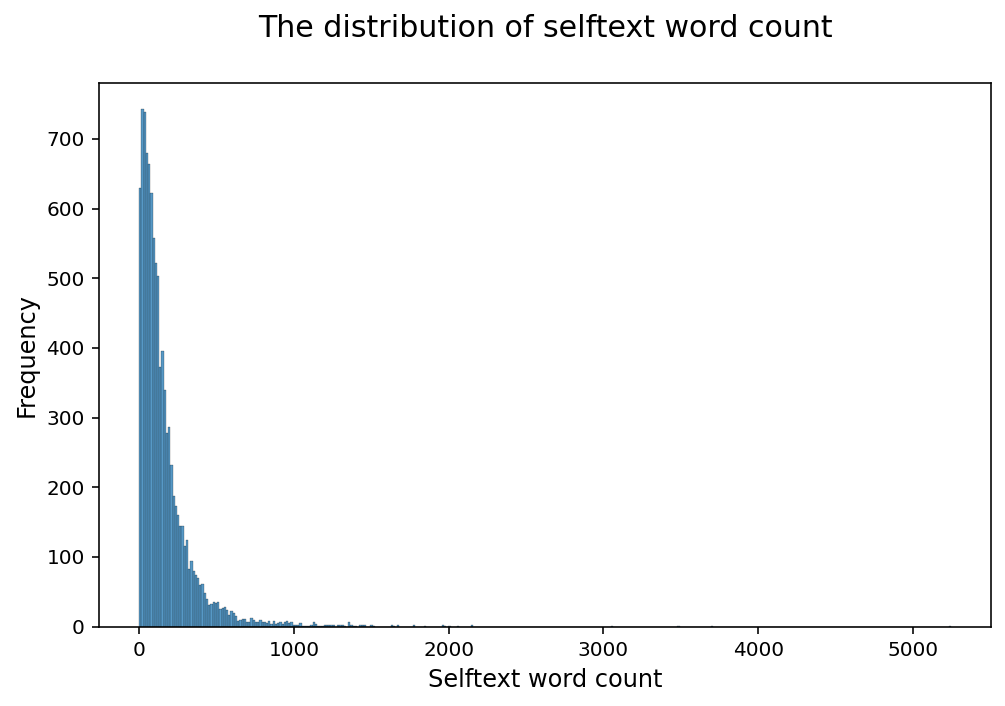

In [597]:
# The distplot of the distribution of selftext word count
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(depression_lonely_data['selftext_word_count'], kde=False, ax = ax)
plt.xlabel('Selftext word count', fontdict = {'fontsize' : 12})
plt.ylabel('Frequency', fontdict = {'fontsize' : 12})
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('The distribution of selftext word count\n', fontdict = {'fontsize' : 15});

**Analysis: The distribution of selftext word count are highly positively skewed with a high frequency of close to zero value.**

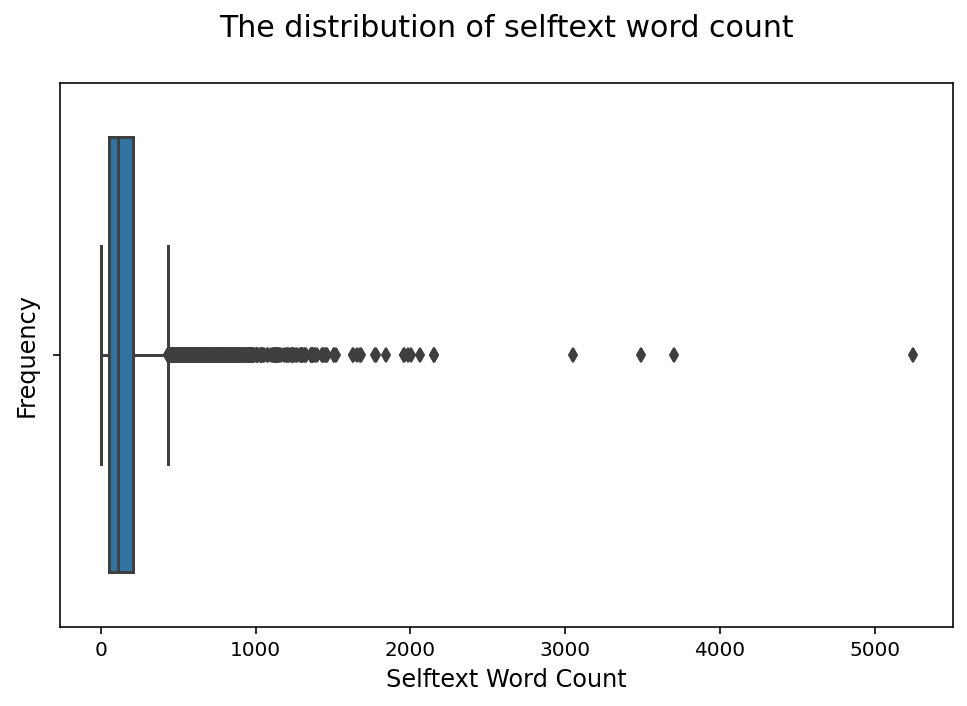

In [596]:
# The boxplot of the distribution of selftext word count
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data = depression_lonely_data, x = "selftext_word_count", orient = 'h')
plt.xlabel("Selftext Word Count", fontdict = {'fontsize' : 12})
plt.ylabel("Frequency", fontdict = {'fontsize' : 12})
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("The distribution of selftext word count\n", fontdict = {'fontsize' : 15});

**Analysis: Majority of the users have less than 500 words in selftext.**

There is a small percentage of users (less than 25%) have a very high amout of words in the selftext with four posts that are having exceptionally high amount of words. This suggest that these four posts are outliers and will be removed.

**Title column**

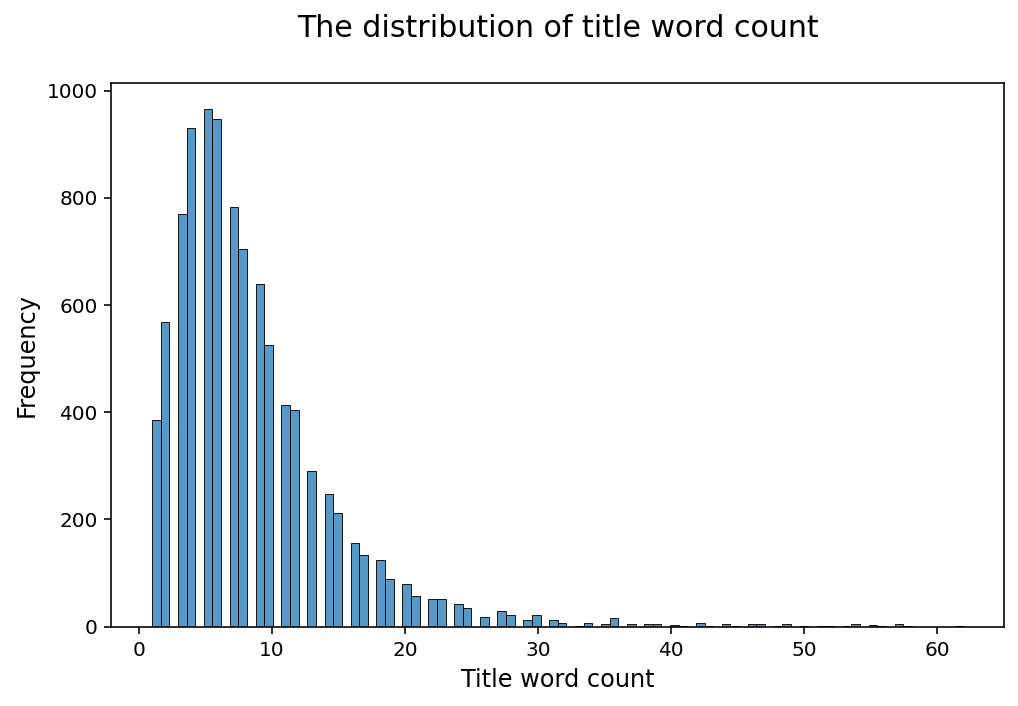

In [595]:
# The distplot of the distribution of title word count
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(depression_lonely_data['title_word_count'], kde=False)
plt.xlabel('Title word count',fontdict = {'fontsize' : 12})
plt.ylabel('Frequency', fontdict = {'fontsize' : 12})
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('The distribution of title word count\n', fontdict = {'fontsize' : 15});

**Analysis: The distribution of selftext word count are highly positively skewed.**

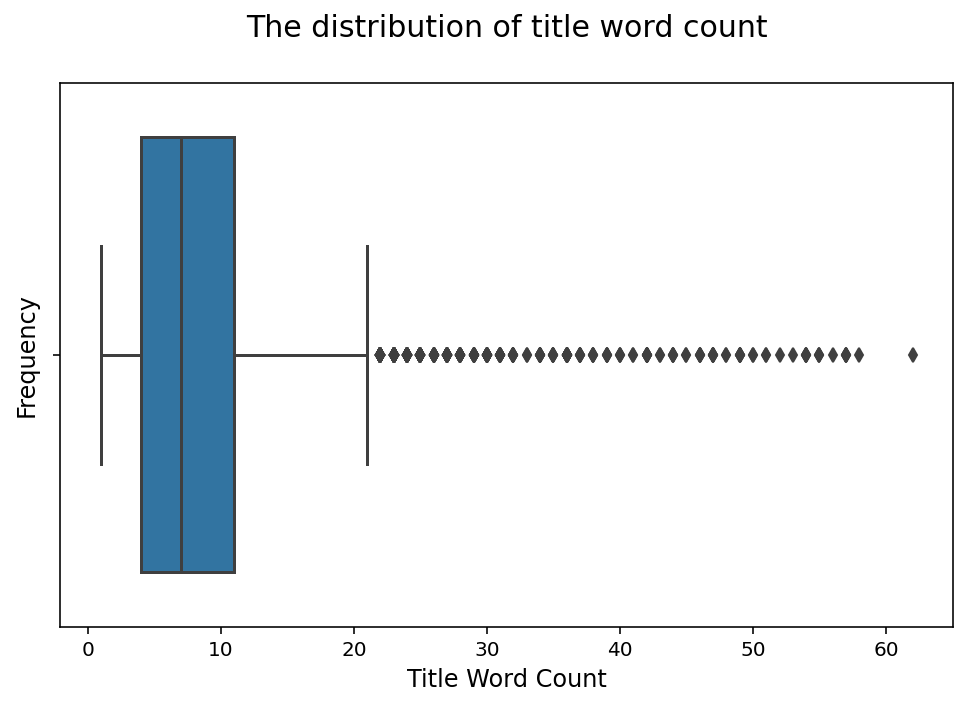

In [594]:
# The boxplot of the distribution of selftext word count
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data = depression_lonely_data, x = "title_word_count", orient = 'h')
plt.xlabel("Title Word Count", fontdict = {'fontsize' : 12})
plt.ylabel("Frequency", fontdict = {'fontsize' : 12})
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title("The distribution of title word count\n", fontdict = {'fontsize' : 15});

**Analysis: Majority of the users have less than 15 words in the title.**

There is a small percentage of users (less than 25%) have a very high amout of words (more than 15 words) in the title with some posts having exceptionally high amount of words, ranging from 20 to 62 words.

#### 4.1.1.2 Post length of selftext and title in depression and foreveralone

In [67]:
# Top 3 selftext having the highest word count
depression_lonely_data.sort_values(by="selftext_word_count", ascending=False)[["selftext", "selftext_word_count", "subreddit"]][0:3]

,selftext,selftext_word_count,subreddit
8138,now that ive gone and done it yes it a second time just as proof it wasnt a total fluke i feel okay to write this where to begin i suppose the short version of my leadup toward trying to date well my younger self isnt so interesting yeah im a typical socially awkward nerd but i never attempted to date in high school or college i was wholly focused on my educationcareer prospects then and lonel...,5245,foreveralone
1466,with this post i share my journey into and out of my depression in the hope that i can help at least one person out of their depression disclaimer i am not affiliated with any person mentioned in this post nor do i get any benefits from promoting the things i talk about i simply want to help people who are in the same place i was in my story february my second child was born our first child wa...,3706,depression
5762,followup from previous post i tried online dating for a week and uhyeah it’s bad in fact online dating is not only every bit as bad as we all say it is its much much worse and not merely in degree but also kind not only are all the typical problems you all complain about there ie not getting matches there are also entirely new problems that i had no idea existed like bot profiles and depressi...,3492,foreveralone


In [68]:
# Top 3 title having the highest word count
depression_lonely_data.sort_values(by="title_word_count", ascending=False)[["author","title", "title_word_count", "subreddit"]][0:3]

,author,title,title_word_count,subreddit
7833,HomeSick10203040,anyone here who had a gf one time and that was that i mean i had a gf once but for all intents and purposes i feel like i am a fa guy and will never find anyone i dont even know how i managed to get a gf i dont know how to replicate it since it was just pure luck,62,foreveralone
7386,Lilybb16,o hate having a female body i fuckin hate i wanna cut it off with a knifethats why im gonna be forever slonethe though of having hetetosexual sex as a woman makes me feels humiliated i feel mental terror at the though of being f its do gross n dehumanizing i hate being piece of meat with hole,58,foreveralone
3123,Academic-Broccoli320,hi all just want to see what your thoughts are about depression and retail therapy here is just a little story i wrote to put my feelings on page would love to hear other stories because depression is freaking hard sometimes but i know we will all one day be out on the other side of this,57,depression


In [602]:
#Summary statistics of word count in forum
depression_lonely_data.groupby(["subreddit"]).agg({"selftext_word_count": 'describe',"title_word_count": 'describe' })

selftext_word_count                                            \
                           count        mean         std  min   25%    50%   
subreddit                                                                    
depression                5025.0  170.376318  193.261592  1.0  57.0  116.0   
foreveralone              4804.0  160.289967  214.228257  1.0  47.0  101.0   

                             title_word_count                                \
                 75%     max            count      mean       std  min  25%   
subreddit                                                                     
depression    211.00  3706.0           5025.0  7.566965  5.891733  1.0  4.0   
foreveralone  197.25  5245.0           4804.0  9.446711  6.857482  1.0  5.0   

                               
              50%   75%   max  
subreddit                      
depression    6.0  10.0  57.0  
foreveralone  8.0  12.0  62.0

**Analysis: There is a non-symmetrical distribution in both depression and foreveralone selftext_word_count and title_word_count**

There is a non-symmetrical distribution in both depression and foreveralone selftext_word_count and title_word_count with the presence of an extremely high maximum value that is more than three standard deviation from the mean. With comparison to depression, the foreveralone has longer title word count with shorter selftext word count as observed by the mean and median. As seen from the top three selftext having the maximum word count, there is a single post of selftext in foreveralone having more than 5000 words while the second post with about 3500 words, which further heighten the skewness of the curve. To gain a better insight, we will explore the distribution of selftext and title word in depression and foreveralone respectively.

#### 4.1.1.3 Distribution of selftext and title word count in depression and foreveralone

**Selftext column**

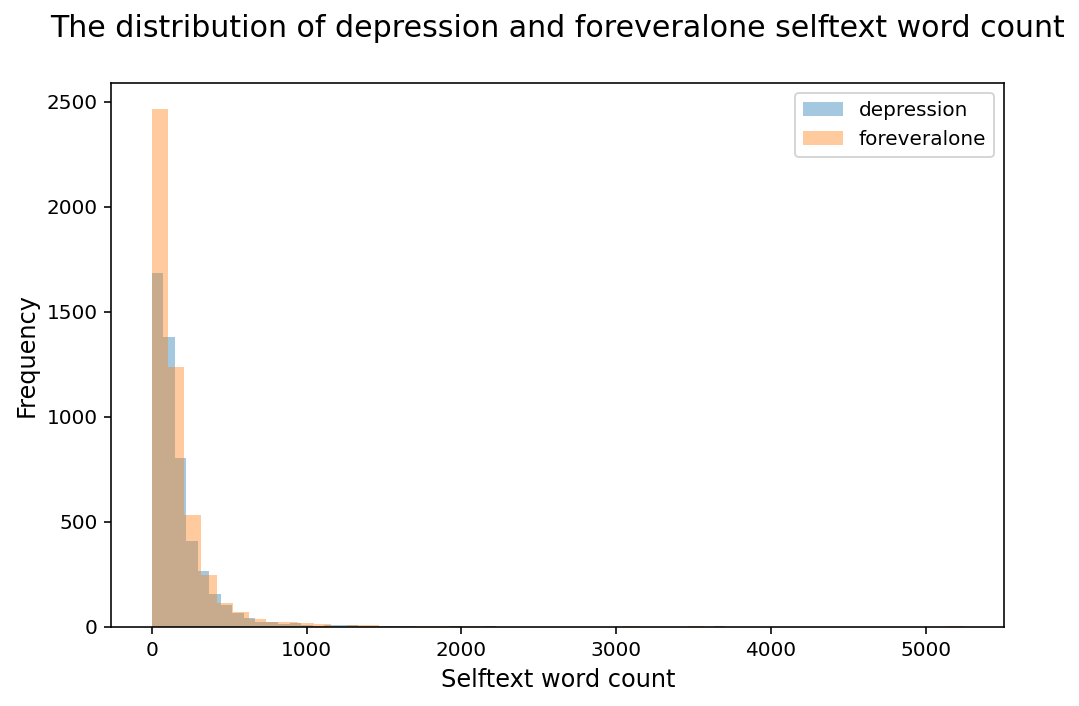

In [593]:
# The distplot of the distribution of depression and foreveralone selftext word count
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(depression_lonely_data[depression_lonely_data['subreddit'] == 'depression']['selftext_word_count'], kde=False, label='depression')
sns.distplot(depression_lonely_data[depression_lonely_data['subreddit'] == 'foreveralone']['selftext_word_count'], kde=False, label='foreveralone')
plt.xlabel('Selftext word count', fontdict = {'fontsize' : 12})
plt.ylabel('Frequency', fontdict = {'fontsize' : 12})
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('The distribution of depression and foreveralone selftext word count\n', fontdict = {'fontsize' : 15});
plt.legend();

**Analysis: The distribution between depression and foreveralone in selftext word count are similar, which are highly positively skewed.**

Foreveralone has a much higher frequency with zero selftext compared to depression and the distribution between depression and foreveralone are similar, which is highly positvely skewed.

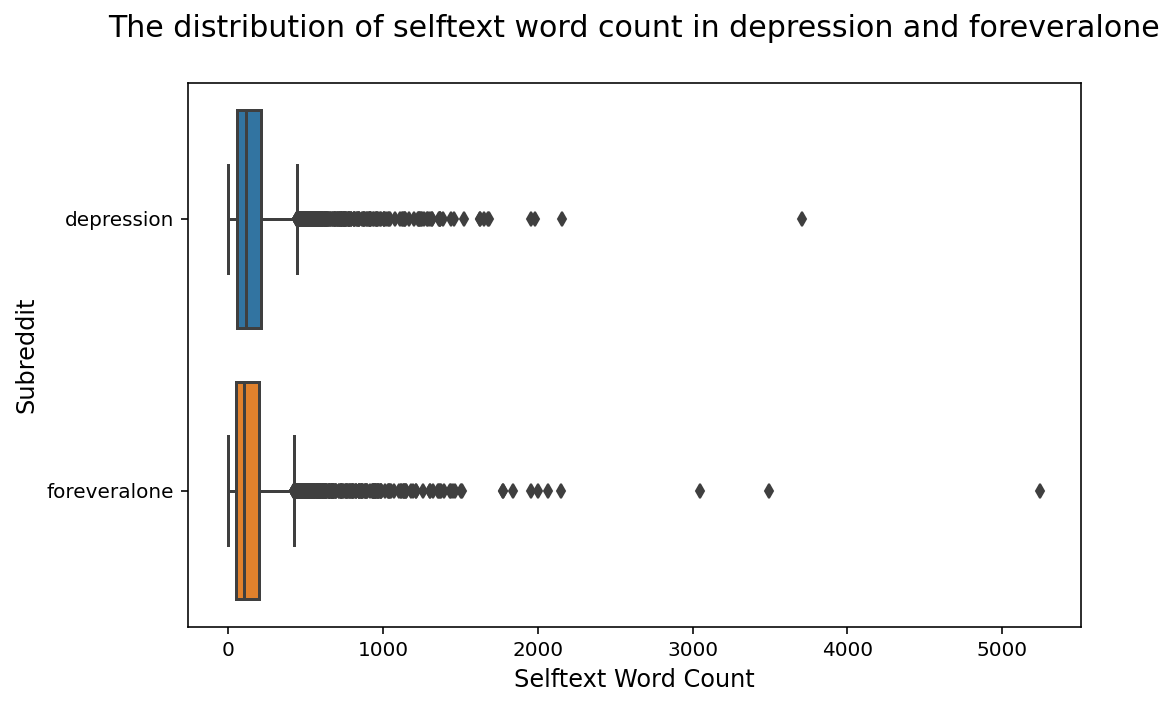

In [591]:
# The boxplot of the distribution of depression and foreveralone selftext word count
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data = depression_lonely_data, x = "selftext_word_count", y = "subreddit", orient = 'h')
plt.xlabel("Selftext Word Count", fontdict = {'fontsize' : 12})
plt.ylabel("Subreddit", fontdict = {'fontsize' : 12})
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title(("The distribution of selftext word count in depression and foreveralone\n"), fontdict = {'fontsize' : 15});

**Analysis: Both distribution in depression and foreveralone are similar with four posts having more than 3000 words**

Majority of the users have about 200 words with less than 25% having a range of 500 to more than 5000 words. There are four posts that have more than 3000 words, with 3 posts being in foreveralone and 1 post being in depression. For a better comparison between the depression and foreveralone, we will be removing these four posts. In general, both distribution of word counts are similar in depression and foreveralone that indicates that the word counts are fairly distributed across both forums.

**Title column**

C:\Users\cxliew\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


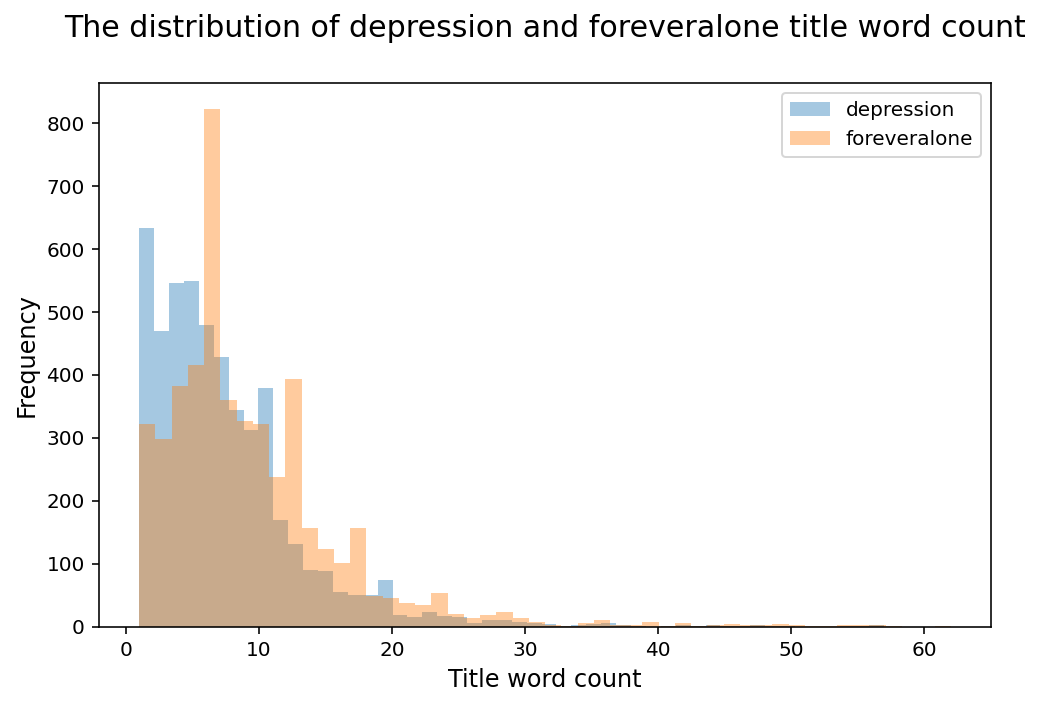

In [592]:
# The distplot of the distribution of depression and foreveralone title word count
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(depression_lonely_data[depression_lonely_data['subreddit'] == 'depression']['title_word_count'], kde=False, label='depression')
sns.distplot(depression_lonely_data[depression_lonely_data['subreddit'] == 'foreveralone']['title_word_count'], kde=False, label='foreveralone')
plt.xlabel('Title word count', fontdict = {'fontsize' : 12})
plt.ylabel('Frequency', fontdict = {'fontsize' : 12})
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('The distribution of depression and foreveralone title word count\n', fontdict = {'fontsize' : 15});
plt.legend();

**Analysis: The title posts in forever alone are generally longer than the title posts in depression.**

The distribution of both depression and foreveralone are positively skewed. In general, depression title posts has a lower word counts in comparison with foreveralone title posts. The most common word count used in the title by the users in depression and foreveralone differs. In depression, the most common word count is about 8 words with majority of the title posts having words lesser than 10 words. While, the most common word count in foreveralone is either about 5 words or 11 words, with the majority having less than 15 words.

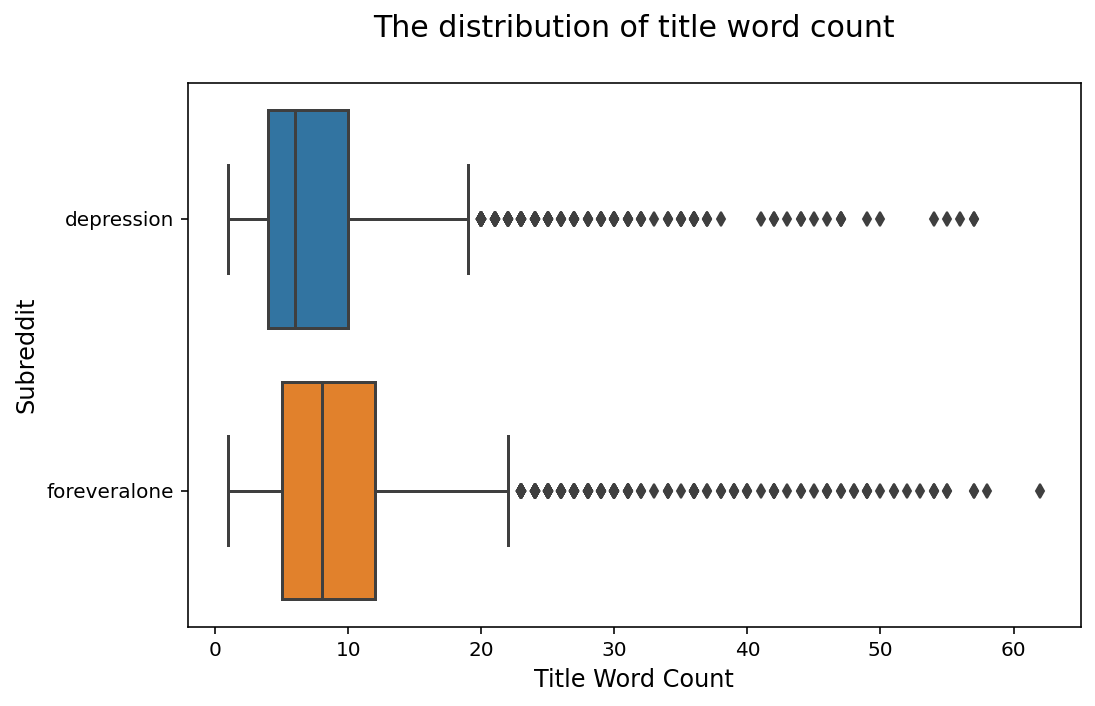

In [590]:
# Title word count boxplot
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data = depression_lonely_data, x = "title_word_count", y = "subreddit", orient = 'h')
plt.xlabel("Title Word Count", fontdict = {'fontsize' : 12})
plt.ylabel("Subreddit", fontdict = {'fontsize' : 12})
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title(("The distribution of title word count\n"), fontdict = {'fontsize' : 15});

**Analysis: Majority of the title posts in foreveralone have a longer range of words than in depression.**

Majority of the title posts in foreveralone words range from 5 to 12 words while in depression is 4-9 words. There are less than 25% of the posts having a high number of words that ranges from 22-62 words in foreveralone and 15 to 57 words in depression.

### 4.1.2 Remove zero word counts and outliers in selftext and title

For better comparison, we will be removing the four ourliers in selftext as observed in the boxplot above and zero word counts in selftext and title. 

#### 4.1.2.1. Removal of outliers in selftext

**Selftext column**

In [74]:
# Selftext having more than 3000 words
depression_lonely_data[depression_lonely_data["selftext_word_count"]>3000]

,author,subreddit,selftext,title,created_utc,selftext_word_count,title_word_count
1466,LuciferiusEx,depression,with this post i share my journey into and out of my depression in the hope that i can help at least one person out of their depression disclaimer i am not affiliated with any person mentioned in this post nor do i get any benefits from promoting the things i talk about i simply want to help people who are in the same place i was in my story february my second child was born our first child wa...,i was ready to do anything and here is what helped in the end,1616919532,3706,14
5762,aslfingerspell,foreveralone,followup from previous post i tried online dating for a week and uhyeah it’s bad in fact online dating is not only every bit as bad as we all say it is its much much worse and not merely in degree but also kind not only are all the typical problems you all complain about there ie not getting matches there are also entirely new problems that i had no idea existed like bot profiles and depressi...,week of seriously trying to find someone,1613361677,3492,7
6219,speeddial123,foreveralone,ive read several posts here about the impossibility of losing your virginity after youve turned there seems to be a widespread but erroneous recognition that it simply cannot happen if one havent had their sexual debut before the age of well ive recently wanted to share my story from the last year to prove this wrong and maybe it can inspire and give hope to some of you years old and virgin i ...,lost my virginity as a heres what happened,1611602890,3048,8
8138,RisingChaos,foreveralone,now that ive gone and done it yes it a second time just as proof it wasnt a total fluke i feel okay to write this where to begin i suppose the short version of my leadup toward trying to date well my younger self isnt so interesting yeah im a typical socially awkward nerd but i never attempted to date in high school or college i was wholly focused on my educationcareer prospects then and lonel...,its not all i wanted but damn if it doesnt feel good to at least get that gorilla off my back,1605156515,5245,21


**Analysis: There are four posts having more than 3000 word counts and these have succesfully been removed**

#### 4.1.2.2. Removal of zero word counts in selftext and title

**Selftext column**

In [75]:
# To check for zero word counts in selftext
depression_lonely_data.sort_values(by='selftext_word_count').head()

,author,subreddit,selftext,title,created_utc,selftext_word_count,title_word_count
8747,kolesniko,foreveralone,,my depression whenever someone tries to assure me that everything is gonna be alright,1603275312,0,14
8632,Wooden-Building,foreveralone,,so accurate,1603619590,0,2
814,Jjcasta,depression,,this seriously help,1617055027,0,3
5393,gprateek,foreveralone,,me who has followers,1615279915,0,4
5879,sheerdeer,foreveralone,,anyone wanna talk i need to get some things off my chest,1613154141,0,12


In [76]:
# To check the number of zero word counts in selftext
depression_lonely_data[depression_lonely_data['selftext_word_count'] == 0].count()[["selftext"]]

selftext    16
dtype: int64

**Analysis: There are 16 zero word counts in selftext and these posts will be removed**

In [77]:
# To remove the missing values for selftext
depression_lonely_data = depression_lonely_data[depression_lonely_data['selftext_word_count'] != 0] 
depression_lonely_data = depression_lonely_data.reset_index(drop=True)
depression_lonely_data.sort_values(by='selftext_word_count').head(2)

,author,subreddit,selftext,title,created_utc,selftext_word_count,title_word_count
8347,jhertz14,foreveralone,cheers,i have been on “first dates” in and not a single second date,1604389494,1,13
5173,WurzelMan675,foreveralone,title,rate me in private dms,1615941989,1,5


**Title column**

In [78]:
# To check for missing values in selftext
depression_lonely_data.sort_values(by='title_word_count')[0:3]

,author,subreddit,selftext,title,created_utc,selftext_word_count,title_word_count
978,Vexee3,depression,with depression i am just merely a shell of my old self i am filled with hate for my own existence at night i cant sleep because i think about all the possibilities for my life and myself if i didn’t have these issues plaguing me with depression and anxiety i am not understood by anyone i look for fixes that get recommended for those like me who are suffering but nothing works i am unable to ...,,1617025362,103,0
1095,rorykoifish,depression,sometimes i wish someone relied on me like if i was someone’s favorite person i would have a valid reason to not kms,,1616995309,23,0
3906,steelprimedabbleyoo,depression,my reason to feel like shit is goddamn stupid its an accumulation of my parents ten year old divorce my crush rejecting me the stress from school and the stress from covid rn its midnight on the one year anniversary of the québec lockdown all that stress lead to me escaping reality through music the internet and transformers i never talk to anyone im a years old piece of asocial shit everyone ...,,1615611904,131,0


In [79]:
depression_lonely_data[depression_lonely_data['title_word_count'] == 0].count()[["title"]]

title    25
dtype: int64

**Analysis: There are 25 zero word counts in title and these posts will be removed**

In [80]:
# To drop the missing values for title
depression_lonely_data = depression_lonely_data[depression_lonely_data['title_word_count'] != 0]
depression_lonely_data = depression_lonely_data.reset_index(drop=True)
depression_lonely_data.sort_values(by='title_word_count')[0:3]

,author,subreddit,selftext,title,created_utc,selftext_word_count,title_word_count
4165,frideno,depression,why does it feel like every thought i have is not valid and i am just doing it out of seeking attention it is like i am arguing with myself thinking one thing and then victim blaming myself over it kinda doing it right now just because i called myself a victim it sucks my own mind hates me hating myself for crying once and then hating myself for hating myself because i cried it is all to shit ...,rant,1615570074,156,1
4006,bananaz000,depression,firstly sorry if there is some typos i really dont want to read what i wrote because i would delete everything i literally joined reddit just to write this so bare with me and please read what i this before i was years old everything in my life was normal normal family normal life then when i turned seven my dad passed away he was pretty young at the time yet he died of a medical mistake we we...,loop,1615596416,916,1
4011,AcceptableParfait171,depression,“i steal a few breaths from the world for a minute and then ill be nothing forever and all of my memories and all of the things i have seen will be gone with my eyes with my body with me” i feel like this a lot and i didn’t know how to explain it but mitski did it for me there’s a lot of times where i feel like everything is pointless in the grand scheme of things how do you get away from this...,hopeless,1615595699,89,1


In [81]:
# To check the new ratio distribution between depression and foreveralone
depression_lonely_data.groupby("subreddit").size()

subreddit
depression      5025
foreveralone    4804
dtype: int64

**Analysis: The new ratio distribution between depression and foreveralone is 49:51.**

**Summary**
* There is a non-symmetrical distribution in both selftext_word_count and title_word_count, which are highly positvely skewed.
* Both zero word counts and outliers in selftext and title has been removed.
* The new ratio distribution between depression and foreveralone is 49:51.

Selftext:
* Majority of the users have less than 500 words in selftext (post).
* Foreveralone has a much higher frequency with zero selftext compared to depression.
* Both selftext distribution in depression and foreveralone are similar with four posts having more than 3000 words.

Title:
* Majority of the users have less than 15 words in the title post.
* Majority of the title posts in foreveralone have a longer range of words than in depression.
* In depression, the most common word count in title post is about 8 words with majority having lesser than 10 words. 
* In foreveralone, the most common word count is either about 5 words or 11 words, with the majority having less than 15 words.

## 4.2 Frequency of total posts by authors

### 4.2.1 Total posts by authors

The frequency of the post posted by the author in the respective forum will be further studied and a new column of total posts by per author will be generated.

Note: There will be a few codes that will take a long time to run the code. Thus, it will be placed as comment to prevent the execution of this code. To facilitate the code execution, the dataframe with the column generated will be exported and imported again.

#### 4.2.1.1 Creation of column of total posts posted by an author

In [82]:
# Create a column of index for reference column
depression_lonely_data["index"] = depression_lonely_data.index

In [83]:
# Define function for counting the number of posts posted by an author in the forum.
def total_posts_per_author(dataframe, ref_column):
    users = []
    counter = 0
    for i, author1 in enumerate(dataframe["author"]):
        for j, author2 in enumerate(dataframe["author"]):
            if dataframe["author"][i] == dataframe["author"][j]:
                counter+=1
        users.extend([[dataframe[ref_column][i], counter]])
        counter = 0
    return users

In [84]:
# To create a column of the number of posts posted by an author
#users = total_posts_per_author(depression_lonely_data,"index")

In [85]:
# To generate a dataframe from the list generated by the function
# users_df = pd.DataFrame(users, columns = ["index", "total_posts"])
# users_df.head()

In [86]:
# # The merge of the the new dataframe with the existing dataframe and drop the reference column
# depression_lonely_data = pd.merge(depression_lonely_data, users_df,how="left", on='index')
# depression_lonely_data = depression_lonely_data.drop(columns=["index"])
# depression_lonely_data.sort_values(["total_posts","author"], ascending = False).head(5)

In [87]:
# For easier viewing, the dataframe above will be exported and imported
# Placed the # to refrain from executing
#depression_lonely_data.to_csv("../data/depression_lonely_data.csv", index = False) 

In [90]:
# To import the dataframe above
depression_lonely_data = pd.read_csv('../data/depression_lonely_data.csv')

#### 4.2.1.1 Distribution of total posts posted by an author

In [91]:
# Summary statistics of total_posts
depression_lonely_data.total_posts.describe()

count    9829.000000
mean        3.940279
std         6.778293
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        45.000000
Name: total_posts, dtype: float64

**Analysis: There is a non-symmetrical distribution in total_posts posted by a author**

There is a non-symmetrical distribution in total_posts posted by a author with majority of the authors posting 1 post. There are a few users (less than 25%) that post more than 3 posts till up to 45 posts.

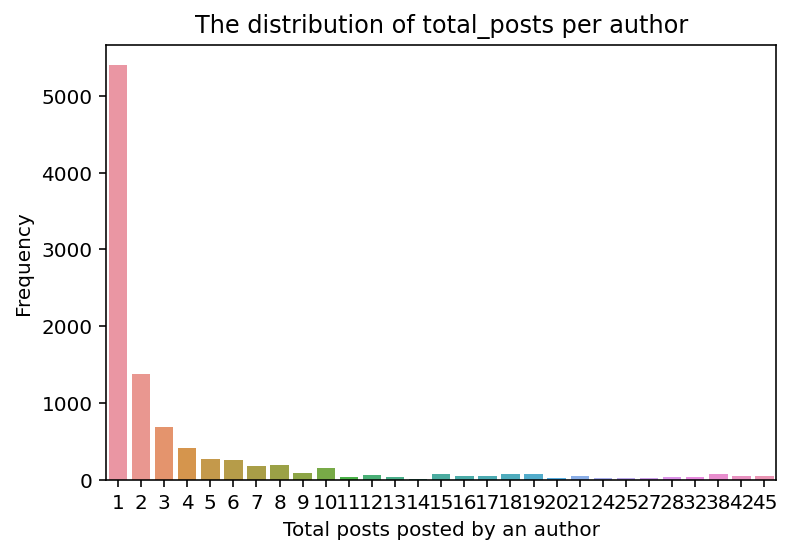

In [92]:
# The countplot of the distribution of total posts
sns.countplot(data = depression_lonely_data, x = 'total_posts')
plt.xlabel('Total posts posted by an author')
plt.ylabel('Frequency')
plt.title('The distribution of total_posts per author');

**Analysis: The distribution of total posts per author are highly positively skewed with a majority having one post.**

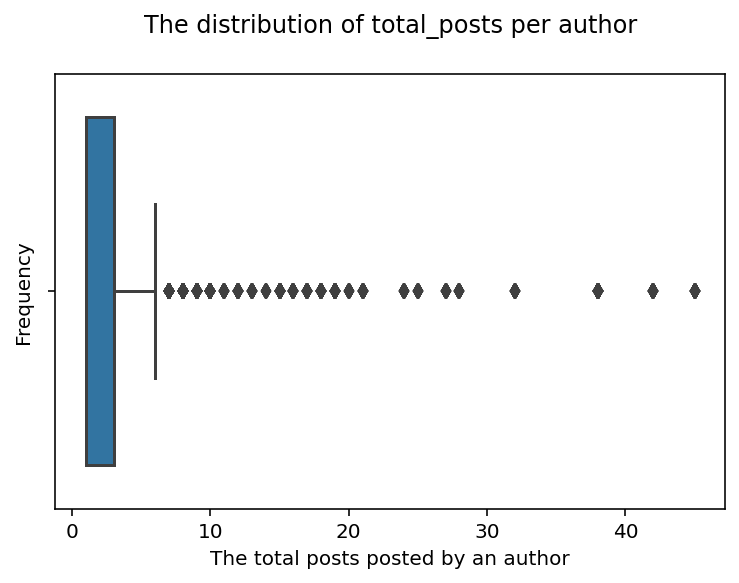

In [93]:
# The boxplot of the distribution of total posts
sns.boxplot(data = depression_lonely_data, x = "total_posts", orient = 'h')
plt.xlabel("The total posts posted by an author")
plt.ylabel("Frequency")
plt.title(("The distribution of total_posts per author\n"));

**Analysis: Majority of the users have less than 5 posts per author.**

There is a small percentage of users (less than 25%) have a very high amout of posts per author with more than 5 posts to 45 posts.

### 4.2.2 Total posts in depression and foreveralone

In [94]:
#Summary statistics of word count in forum
depression_lonely_data.groupby("subreddit")["total_posts"].describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
depression,5025.0,1.700299,2.355229,1.0,1.0,1.0,2.0,28.0
foreveralone,4804.0,6.283306,8.801787,1.0,1.0,3.0,7.0,45.0


In [95]:
depression_lonely_data.groupby(["subreddit"]).agg({"created_utc": ["min", "max"]})

created_utc            
                     min         max
subreddit                           
depression    1615420610  1617206312
foreveralone  1600057348  1617198755

**Analysis: There is a non-symmetrical distribution in total_posts of depression and foreveralone and foreveralone has more posts per user in comparison with depression.**

There is a non-symmetrical distribution in both depression and foreveralone in total_posts. Foreveralone published more posts than depression in general with about 50% of the authors posted about 3 posts and with the maximum posts posted is  45 posts per author. On the other hand, depression, majority of the users posted only 1 post per user with some users posted more than 1 to 28 posts.

This might be due mainly of the disporportion of posts collected for depression and foreveralone. As depression mainly only allow text, and the criteria during the data collection is to exclude post with video, this might have resulted in many posts excluded out from foreveralone compared to depression. Thus to attain 5000 posts, the time period posts collected for depression (10 March 2021 to 31 March 2021) is different from foreveralone (14 September 2020 to 31 March 2021). Hence, this might not have a fair comparison in which foreveralone with a longer time period (6 months) may have visited by the same author multiple times in comparison with depression, having a short time period of less than a month.

Nevertheless, we would like to investigate if there are any author that posts both forums as both depression and foreveralone share some similarity and those with severe loneliness can develop depression.

### 4.2.3 Presence of unique authors in both depression and foreveralone

In [96]:
# Create a depression and lonely dataframe consisting of the total posts
depression_posts = depression_lonely_data[depression_lonely_data["subreddit"] == 'depression']
lonely_posts = depression_lonely_data[depression_lonely_data["subreddit"] == 'foreveralone']

# Create dataframe with total posts and unique authors for posts for both, depression, lonely
x = [depression_lonely_data.shape[0], depression_posts.shape[0], lonely_posts.shape[0]]
index = ['depression_and_foreveralone', 'depression', 'foreveralone']
col = ['total_post']
totalpost_authors = pd.DataFrame(x, index = index, columns = col)
totalpost_authors['unique_authors'] = [depression_lonely_data.author.nunique(), depression_posts.author.nunique(), lonely_posts.author.nunique()]
totalpost_authors['repeated_post'] = totalpost_authors['total_post'] - totalpost_authors['unique_authors']

# Unique authors present in both depression and lonely forum
users_both_forum = (depression_posts.author.nunique() + lonely_posts.author.nunique())- depression_lonely_data.author.nunique()
print(f"Authors present in both depression and lonely forum are {users_both_forum}")

totalpost_authors

Authors present in both depression and lonely forum are 52


,total_post,unique_authors,repeated_post
depression_and_foreveralone,9829,6631,3198
depression,5025,4261,764
foreveralone,4804,2422,2382


**Analysis: The depression unique authors are 4260, the foreveralone unique authors are 2421 and the unique authors present in both depression and foreveralone is 52.**

There is difference between the total posts and unique authors which suggests that there are repeated posts. This is also as observed in our observation above. There are repeated posts in foreveralone more than depression forum. This could possibly be biased due to the data collection extraction. Interestingly the are 52 authors that are present in both depression and foreveralone, which is less than 1% of the compilation dataset. This is possible as both depression and loneliness have high similarity and a severe loneliness can lead to depression making a person depressed and lonely. Thus, it is to note that there are authors that are lonely and depressed but as there is 1% authors of the both forums, the dataset is representative for our further analysis to distinguish and classify between the two forums.

## 4.3 Usage of emoji proportion in depression_data and lonely_data

We would like to know the proportion of posts containing emoji usage in depression_data and lonely_data by authors and if emoji usage have some indicator to distinguish the forum in which the posts belong to.

To explore this, we will perform the below for selftext and title respectively.
1. search for emoji
2. extract the emoji into a dataframe
3. calculate the total posts posted by each author
4. identify the total emojis, unique emojis, total posts containing emojis, unique authors posting the posts and the subreddit the authors belong to.

**Selftext column**

In [97]:
# To check the presence of emoji and create a dataframe of the emoji and the respective original dataframe index
emoji_list = re.compile("[""\U00002B50-\U00002BFF" #Stars
                        '\U00002600-\U000026FF' # Miscellaneous Symbols eg Weather, Map
                        '\U00002700-\U000027BF' # Dingbats
                        "\U0001FA00-\U0001FAFF" # Symbols and Pictographs Extended
                        "\U0001F1E0-\U0001F1FF" # Letters
                        "\U0001F300-\U0001F5FF" # Symbols and Pictographs
                        "\U0001F600-\U0001F67F" # Emoticons + Ornaments Dingbats
                        "\U0001F680-\U0001F6FF" # Transport and Map Symbols
                        "\U0001F700-\U0001F7FF" # Alchemical Symbols + Geometric Shape Extended
                        "\U0001F800-\U0001F8FF" # Arrows-C
                        "\U0001F900-\U0001F9FF" # Symbols and Pictographs
                       "]+", flags=re.UNICODE)
emoji = depression_lonely_data['selftext'].apply(lambda x:emoji_list.findall(x))
emoji_selftext = [(emoji[i], i) for i in range(len(emoji)) if emoji[i]!=[]]
selftext_df = pd.DataFrame(emoji_selftext, columns = ["emoji", "index"])
selftext_df.head(2)

,emoji,index
0,[🤗],1
1,[🤯],22


In [98]:
# To extract the emojis of each posts into a list together with the original dataframe index, subreddit and author
list_selftext_emoji = []
for j, k in depression_lonely_data.iterrows():
    for i, row in selftext_df.iterrows():
        if selftext_df["index"][i] == j:
            list_selftext_emoji.extend([[selftext_df['emoji'][i],j, depression_lonely_data["subreddit"][j], depression_lonely_data["author"][j]]])

In [99]:
# Convert the list of emojis of each post into a dataframe 
selftext_emoji_list = pd.DataFrame(list_selftext_emoji, columns = ['selftext_emoji', 'ori_post_index', 'subreddit', 'author'])
selftext_emoji_list.sort_values(by="author").head(5)

,selftext_emoji,ori_post_index,subreddit,author
46,"[😂, 😊]",2382,depression,0001010101ems
18,[🤷],663,depression,AH-dont-find-dis
190,[💖],8503,foreveralone,Aidenthefiremaker
75,"[🥲, 🙃]",3702,depression,Alternative_Clerk_70
96,"[😀, 😃, 😄]",5018,depression,AngelicOSaturn


In [100]:
# To extract the emoji from the dataframe into a list for emojis count
emoji_list = [list_selftext_emoji[i][0] for i in range(len(list_selftext_emoji))]
emoji_list_selftext_full = []
for i in emoji_list:
    for j in i:
        emoji_list_selftext_full.append(j)

In [101]:
print(f"Total number of emoji in selftext is {len(emoji_list_selftext_full)}")
print(f"Total unique emoji in selftext is {len(set(emoji_list_selftext_full))}")

Total number of emoji in selftext is 352
Total unique emoji in selftext is 157


**Analysis: Successfully extracted emoji from selftext and there are 351 emojis in total with 156 unique emojis**

The emojis has succesfully extracted from selftext (posts) together with their respective information. The total number of emoji found in selftext is 351 with 156 unique emoji. This indicates that there is a significant proportion of emojis are repeated across the posts.

We would like to explore which subreddit the emojis belongs to (depression or foreveralone) and the number of posts containing emojis per author. This allows us to gain some insight if emojis usage can facilitate to distinguish the  subreddit which the posts belong to.

**To calculate the total posts posted by an author**

In [102]:
# Create a reference column of index and to count number of emoji posts posted per author
selftext_emoji_list["index"] = selftext_emoji_list.index
selftext_emoji_users = total_posts_per_author(selftext_emoji_list,"index")

In [103]:
#To generate a dataframe from the list generated by the function
selftext_emoji_authors = pd.DataFrame(selftext_emoji_users, columns = ["index", "selftext_emoji_total_posts"])

In [104]:
# Merge the the new dataframe with the existing dataframe and drop the reference column
selftext_emoji_list = pd.merge(selftext_emoji_list, selftext_emoji_authors,how="left", on='index')
selftext_emoji_list = selftext_emoji_list.drop(columns=["index"])
selftext_emoji_list.sort_values(["selftext_emoji_total_posts","author"], ascending = False).head(6)

,selftext_emoji,ori_post_index,subreddit,author,selftext_emoji_total_posts
111,"[😤, 😊]",5500,foreveralone,ODB95,5
120,[😒],5831,foreveralone,ODB95,5
154,[😊],7027,foreveralone,ODB95,5
182,[😔],8384,foreveralone,ODB95,5
216,[😔],9484,foreveralone,ODB95,5
11,"[✅, ✅, ✅, ✅, ✅, ✅, ✅, ✅, ✅, ✅, ✅, ✅, ✅]",492,depression,okbokchoy,4


In [105]:
print(f"Total selftext posts having emoji is {len(selftext_emoji_list)}.")
print(f"Total unique authors using emoji in more than two selftext posts is {selftext_emoji_list[selftext_emoji_list.selftext_emoji_total_posts>1].author.nunique()}.")
print(f"Total unique authors using emoji in selftext is {selftext_emoji_list.author.nunique()}.")

Total selftext posts having emoji is 221.
Total unique authors using emoji in more than two selftext posts is 15.
Total unique authors using emoji in selftext is 196.


In [106]:
# The which forum the selftext containing emoji belongs to
selftext_emoji_list.groupby('subreddit').size()

subreddit
depression       98
foreveralone    123
dtype: int64

In [107]:
# To which forum the authors who wrote selftext with emojis belong to
selftext_emoji_unique_authors = selftext_emoji_list.drop_duplicates(subset="author")
selftext_emoji_unique_authors.groupby("subreddit").size()

subreddit
depression       90
foreveralone    106
dtype: int64

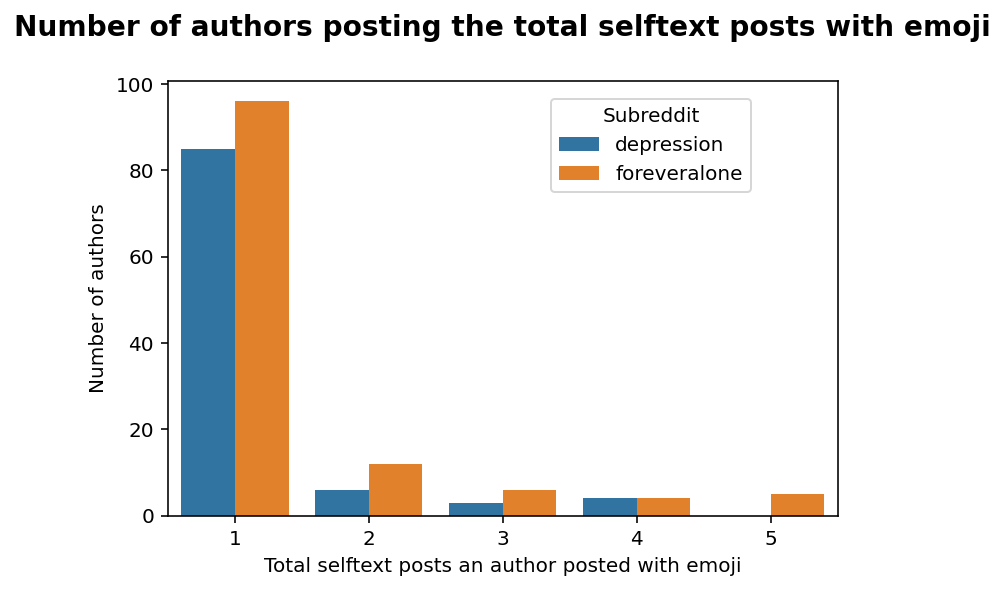

In [108]:
# To visualize the selftext total posts posted by author containing emoji
sns.countplot(data = selftext_emoji_list, x ='selftext_emoji_total_posts', hue = 'subreddit')
plt.legend(title = "Subreddit", bbox_to_anchor = (0.885, 0.98))
plt.xlabel("Total selftext posts an author posted with emoji", fontsize = 10)
plt.ylabel("Number of authors", fontsize = 10)
plt.title("Number of authors posting the total selftext posts with emoji\n", fontsize = 14, weight = 'bold');

**Analysis: Of the total selftext, 2% of the selftext contains emoji and the emoji usage are balanced between the two forums.**

Selftext:

There are 220 selftext contains emoji. Of these 220 selftext posts, 122 posts belong to foreveralone and 98 belongs to depression. Thus, the ratio of posts in foreveralone and depression is 55:45. This suggests that the posts containing emoji are quite balanced between the two forums and the number of posts containing emoji consists of 2% of the total posts.

Authors:

There are 195 unique authors that posted selftext with emoji and of these authors, 15 authors posted more than 2 posts containing emoji. This indicate there are many authors who uses emoji in their selftext and 105 of these authors belong to foreveralone while 90 authors belong to depression. With a ratio of authors belonging to foreveralone to depression is 54: 46, the emoji usage among authors belonging to this two forums are proportional and selftext having emoji would not be able to use to distiguish the forum in which the posts belong to.

**Title column**

In [109]:
# To check the presence of emoji and create a dataframe containing the emoji and the respective original index
emoji_list = re.compile("[""\U00002B50-\U00002BFF" #Stars
                        '\U00002600-\U000026FF' # Miscellaneous Symbols eg Weather, Map
                        '\U00002700-\U000027BF' # Dingbats
                        "\U0001FA00-\U0001FAFF" # Symbols and Pictographs Extended
                        "\U0001F1E0-\U0001F1FF" # Letters
                        "\U0001F300-\U0001F5FF" # Symbols and Pictographs
                        "\U0001F600-\U0001F67F" # Emoticons + Ornaments Dingbats
                        "\U0001F680-\U0001F6FF" # Transport and Map Symbols
                        "\U0001F700-\U0001F7FF" # Alchemical Symbols + Geometric Shape Extended
                        "\U0001F800-\U0001F8FF" # Arrows-C
                        "\U0001F900-\U0001F9FF" # Symbols and Pictographs
                       "]+", flags=re.UNICODE)
emoji_ttl = depression_lonely_data['title'].apply(lambda x:emoji_list.findall(x))
emoji_title = [(emoji_ttl[i], i) for i in range(len(emoji_ttl)) if emoji_ttl[i]!=[]]
title_df = pd.DataFrame(emoji_title)

In [110]:
# To extract the emojis of each posts into a list together with the original dataframe index, subreddit and author
list_title_emoji = []
for j, k in depression_lonely_data.iterrows():
    for i, row in title_df.iterrows():
        if title_df[1][i] == j:
            list_title_emoji.extend([[title_df[0][i],j, depression_lonely_data["subreddit"][j], depression_lonely_data["author"][j]]])

In [111]:
# Convert the list of emojis of each post into a dataframe 
title_emoji_list = pd.DataFrame(list_title_emoji, columns = ["title_emoji","ori_post_index","subreddit","author"])
title_emoji_list.head(5)

,title_emoji,ori_post_index,subreddit,author
0,[🛑],69,depression,Homework-Unlikely
1,[🤗],282,depression,MicrodoseHQ
2,[🤗],284,depression,MicrodoseHQ
3,[💥],396,depression,MontyM_5
4,[😭😭😭😭],677,depression,okbokchoy


In [112]:
# To extract the emoji from the dataframe into a list for emojis count
emoji_list_title = [list_title_emoji[i][0] for i in range(len(list_title_emoji))]
emoji_list_title_full = []
for i in emoji_list_title:
    for j in i:
        emoji_list_title_full.append(j)

In [113]:
print(f"Total number of emoji in title is {len(emoji_list_title_full)}")
print(f"Total unique emoji in title is {len(set(emoji_list_title_full))}")

Total number of emoji in title is 52
Total unique emoji in title is 40


**Analysis: Successfully extracted emoji from title and there are 52 emojis in total with 40 unique emojis**

The emojis has succesfully extracted from title posts together with their respective information. The total number of emoji found in title is 52 with 40 unique emoji. 

To gain some insight if emojis usage can facilitate to distinguish the  subreddit which the posts belong to, we will explore which subreddit the emojis belongs to (depression or foreveralone) and the number of posts containing emojis per author.

**To calculate the total posts posted by an author**

In [114]:
# Create a reference column of index and to count number of emoji posts posted per author
title_emoji_list["index"] = title_emoji_list.index

In [115]:
#To generate a dataframe from the list generated by the function
title_emoji_users = total_posts_per_author(title_emoji_list,"index")
title_emoji_users_df = pd.DataFrame(title_emoji_users, columns = ["index", "title_emoji_total_posts"])
title_emoji_users_df.head()

,index,title_emoji_total_posts
0,0,1
1,1,2
2,2,2
3,3,1
4,4,2


In [116]:
# Merge the the new dataframe with the existing dataframe and drop the reference column
title_emoji_list = pd.merge(title_emoji_list, title_emoji_users_df,how="left", on='index')
title_emoji_list = title_emoji_list.drop(columns=["index"])
title_emoji_list.sort_values(by=['title_emoji_total_posts', "author"], ascending = False).head(6)

,title_emoji,ori_post_index,subreddit,author,title_emoji_total_posts
4,[😭😭😭😭],677,depression,okbokchoy,2
5,[😭],1065,depression,okbokchoy,2
21,[🐢🐢🐢🐢],4836,depression,jujijujijujube,2
22,[😔😔😔],4857,depression,jujijujijujube,2
1,[🤗],282,depression,MicrodoseHQ,2
2,[🤗],284,depression,MicrodoseHQ,2


In [117]:
print(f"Total title posts having emoji is {len(title_emoji_list)}.")
print(f"Total unique authors using emoji in more than two title posts is {title_emoji_list[title_emoji_list.title_emoji_total_posts>1].author.nunique()}.")
print(f"Total unique authors using emoji in title is {title_emoji_list.author.nunique()}.")

Total title posts having emoji is 42.
Total unique authors using emoji in more than two title posts is 4.
Total unique authors using emoji in title is 38.


In [118]:
# The which forum the selftext containing emoji belongs to
title_emoji_list.groupby('subreddit').size()

subreddit
depression      25
foreveralone    17
dtype: int64

In [119]:
# To which forum the authors who wrote selftext with emojis belong to
title_emoji_unique_authors = title_emoji_list.drop_duplicates(subset="author")
title_emoji_unique_authors.groupby("subreddit").size()

subreddit
depression      22
foreveralone    16
dtype: int64

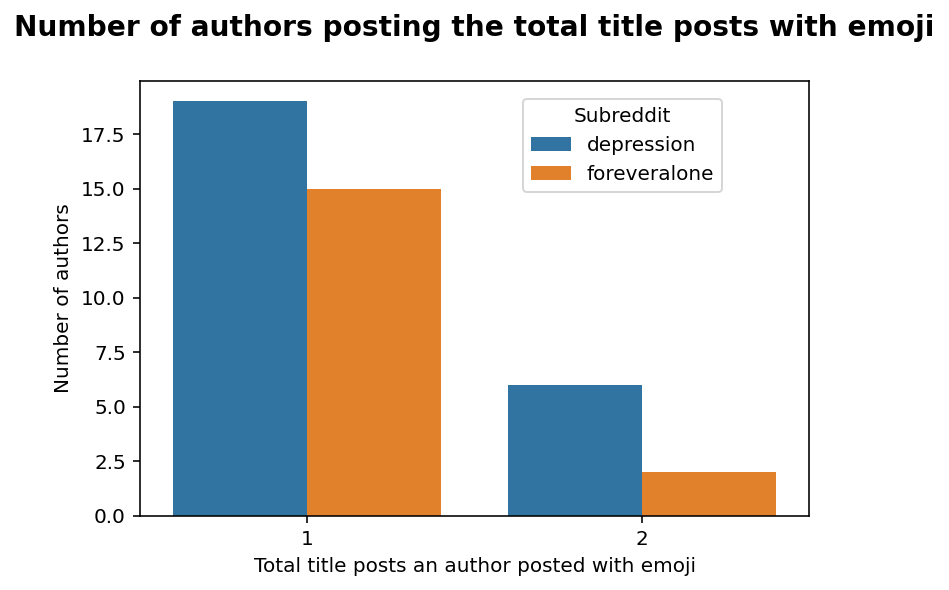

In [120]:
# To visualize the selftext total posts posted by author containing emoji
sns.countplot(data = title_emoji_list, x ='title_emoji_total_posts', hue = 'subreddit')
plt.legend(title = "Subreddit", bbox_to_anchor = (0.885, 0.98))
plt.xlabel("Total title posts an author posted with emoji", fontsize = 10)
plt.ylabel("Number of authors", fontsize = 10)
plt.title("Number of authors posting the total title posts with emoji\n", fontsize = 14, weight = 'bold');

In [121]:
# No of authors that uses emoji in both title and selftext of the posts
title_emoji_list.author[title_emoji_list.author.isin(selftext_emoji_list.author)].nunique()

22

In [122]:
# No of posts that uses emoji in both title and selftext of the posts
title_emoji_list.ori_post_index[title_emoji_list.ori_post_index.isin(selftext_emoji_list.ori_post_index)].nunique()

20

**Analysis: Of the total title, 0.4% of the selftext contains emoji and 22 of thesethe emoji usage are slightly higher in depression forum compared to foreveralone with a ratio of 60:40.**

Title:
There are 42 title contains emoji. Of these 42 selftext posts, 17 posts belong to foreveralone and 25 belongs to depression. Thus, the ratio of title in foreveralone and depression is 40:60. This suggests that the title containing emoji are higher in depression than in foreveralone. Although there might be slight difference, the number of title containing emoji are very few, which consists of 0.4% of the total title.

Authors:
There are 38 unique authors that posted title with emoji and of these authors, 4 authors posted more than 2 posts containing emoji. This indicate there are many authors who uses emoji in their title and 16 of these authors belong to foreveralone while 22 authors belong to depression. With a ratio of authors belonging to foreveralone to depression is 42: 58, the emoji usage among authors belonging to depression forums is higher than in foreveralone. Due to the title having emoji is very few, the emoji usage in title would not be able to use to distiguish the forum in which the posts belong to.

Comparison between title and selftext:
Approximately half of total title containing emoji (20 titles) also have emoji present in the respective selftext and about 58% of total authors (22 unique authors) uses emoji in both title and selftext. As it is high probable if the authors uses emoji in selftext, will use emoji in title, emoji usage in both title and selftext will not be able to use to distinguish the forum in which the posts belong to.

## 4.4 Preprocessing and word counts

### 4.4.1 Removal of emojis and special characters

To enhance the detection of key feature words, emojis and special characters will be removed. 

#### 4.4.1.1 Removal of emojis

**Selftext column**

In [123]:
# Removal of emoji
emoji_list = re.compile("[""\U00002B50-\U00002BFF" #Stars
                        '\U00002600-\U000026FF' # Miscellaneous Symbols eg Weather, Map
                        '\U00002700-\U000027BF' # Dingbats
                        "\U0001FA00-\U0001FAFF" # Symbols and Pictographs Extended
                        "\U0001F1E0-\U0001F1FF" # Letters
                        "\U0001F300-\U0001F5FF" # Symbols and Pictographs
                        "\U0001F600-\U0001F67F" # Emoticons + Ornaments Dingbats
                        "\U0001F680-\U0001F6FF" # Transport and Map Symbols
                        "\U0001F700-\U0001F7FF" # Alchemical Symbols + Geometric Shape Extended
                        "\U0001F800-\U0001F8FF" # Arrows-C
                        "\U0001F900-\U0001F9FF" # Symbols and Pictographs
                       "]+", flags=re.UNICODE)
#To check for emoji prior to removal
emojis_check = depression_lonely_data['selftext'].apply(lambda x:emoji_list.findall(x))
print(f"Prior to removal : {[(emojis_check[i], i) for i in range(len(emojis_check)) if emojis_check[i]!=[]][1:10]}")
# To remove the emoji and check for emoji after the removal
depression_lonely_data['selftext'] = depression_lonely_data['selftext'].apply(lambda x:emoji_list.sub(r"",x))
emojis_check = depression_lonely_data['selftext'].apply(lambda x:emoji_list.findall(x))
print(f"After removal : {[(emojis_check[i], i) for i in range(len(emojis_check)) if emojis_check[i]!=[]][1:10]}")

Prior to removal : [(['🤯'], 22), (['🥂'], 70), (['😫'], 88), (['😟'], 132), (['📷'], 151), (['❤'], 156), (['❤'], 192), (['👇🏼'], 217), (['➡', '🍄❤', '➡'], 282)]
After removal : []


**Title column**

In [124]:
# Removal of emoji
emoji_list = re.compile("[""\U00002B50-\U00002BFF" #Stars
                        '\U00002600-\U000026FF' # Miscellaneous Symbols eg Weather, Map
                        '\U00002700-\U000027BF' # Dingbats
                        "\U0001FA00-\U0001FAFF" # Symbols and Pictographs Extended
                        "\U0001F1E0-\U0001F1FF" # Letters
                        "\U0001F300-\U0001F5FF" # Symbols and Pictographs
                        "\U0001F600-\U0001F67F" # Emoticons + Ornaments Dingbats
                        "\U0001F680-\U0001F6FF" # Transport and Map Symbols
                        "\U0001F700-\U0001F7FF" # Alchemical Symbols + Geometric Shape Extended
                        "\U0001F800-\U0001F8FF" # Arrows-C
                        "\U0001F900-\U0001F9FF" # Symbols and Pictographs
                       "]+", flags=re.UNICODE)
#To check for emoji prior to removal
emojis_check_title = depression_lonely_data['title'].apply(lambda x:emoji_list.findall(x))
print(f"Prior to removal : {[(emojis_check_title[i], i) for i in range(len(emojis_check_title)) if emojis_check_title[i]!=[]][1:10]}")
# To remove the emoji and check for emoji after the removal
depression_lonely_data['title'] = depression_lonely_data['title'].apply(lambda x:emoji_list.sub(r"",x))
emojis_check_title = depression_lonely_data['title'].apply(lambda x:emoji_list.findall(x))
print(f"After removal : {[(emojis_check_title[i], i) for i in range(len(emojis_check_title)) if emojis_check_title[i]!=[]][1:10]}")

Prior to removal : [(['🤗'], 282), (['🤗'], 284), (['💥'], 396), (['😭😭😭😭'], 677), (['😭'], 1065), (['☀'], 1400), (['💔'], 1446), (['😔😞'], 1547), (['💙'], 1617)]
After removal : []


#### 4.4.1.2 Removal of non-ascii (words)

**Selftext column**

In [125]:
# To remove non-ascii characters
depression_lonely_data['selftext'] = depression_lonely_data['selftext'].apply(lambda x:x.encode('ascii', 'ignore').decode('ascii'))
depression_lonely_data['selftext'][1:3]

1                                                                                                                                                                                                                                           im going to do it to avoid responsibilities and shit i dont fcking care i just want to die dont want to talk about it bye just a week from now or something ill be gone 
2    i cant find happiness i think i fuck up everything i help everyone but nobody can help me i am and still not have a girlfriend to heal me i am so done i feel guilty even when i do nothing wrong i started talking to a girl and i dont want to lose her but i feel i will she is sometimes suicidal thinker and its makes it even worse like she live far apart but i will going to meet her next month i ...
Name: selftext, dtype: object

**Title column**

In [126]:
# To remove non-ascii characters
depression_lonely_data['title'] = depression_lonely_data['title'].apply(lambda x:x.encode('ascii', 'ignore').decode('ascii'))
depression_lonely_data['title'][1:3]

1    im going to end my life
2      i cant find happiness
Name: title, dtype: object

### 4.4.2 Removal of stopwords

To remove common words, the NLTK library stopwords ('english') are used as a reference.
The selftext and title will first be tokenized and stop words are removed with reference to the library.

Note: After removal, the words are join into a string as this data will be used for preprocessing and modeling

In [127]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\w+', gaps=False)

**Selftext column**

In [132]:
# Tokenize the selftext and input into a new column
depression_lonely_data["selftext_tokenize"]= depression_lonely_data.selftext.apply(lambda post:tokenizer.tokenize(post))
depression_lonely_data.head(2)

,author,subreddit,selftext,title,created_utc,selftext_word_count,title_word_count,total_posts,selftext_tokenize,selftext_stopremoval,title_tokenize,title_stopremoval
0,hatetheseparties521,depression,im worried i permanently fd up my dick how rare is this disease from antidepressants,how common is pssd,1617206312,15,4,2,"[im, worried, i, permanently, fd, up, my, dick, how, rare, is, this, disease, from, antidepressants]",im worried permanently fd dick rare disease antidepressants,"[how, common, is, pssd]","[common, pssd]"
1,jaksiejsndnd,depression,im going to do it to avoid responsibilities and shit i dont fcking care i just want to die dont want to talk about it bye just a week from now or something ill be gone,im going to end my life,1617206166,37,6,2,"[im, going, to, do, it, to, avoid, responsibilities, and, shit, i, dont, fcking, care, i, just, want, to, die, dont, want, to, talk, about, it, bye, just, a, week, from, now, or, something, ill, be, gone]",im going avoid responsibilities shit dont fcking care want die dont want talk bye week something ill gone,"[im, going, to, end, my, life]","[im, going, end, life]"


In [133]:
# Remove stop words in selftext using NLTK library
depression_lonely_data["selftext_stopremoval"]= depression_lonely_data.selftext_tokenize.apply(lambda item:([word for word in item if word not in stopwords.words('english') and len(word)>1]))
depression_lonely_data.head(2)

,author,subreddit,selftext,title,created_utc,selftext_word_count,title_word_count,total_posts,selftext_tokenize,selftext_stopremoval,title_tokenize,title_stopremoval
0,hatetheseparties521,depression,im worried i permanently fd up my dick how rare is this disease from antidepressants,how common is pssd,1617206312,15,4,2,"[im, worried, i, permanently, fd, up, my, dick, how, rare, is, this, disease, from, antidepressants]","[im, worried, permanently, fd, dick, rare, disease, antidepressants]","[how, common, is, pssd]","[common, pssd]"
1,jaksiejsndnd,depression,im going to do it to avoid responsibilities and shit i dont fcking care i just want to die dont want to talk about it bye just a week from now or something ill be gone,im going to end my life,1617206166,37,6,2,"[im, going, to, do, it, to, avoid, responsibilities, and, shit, i, dont, fcking, care, i, just, want, to, die, dont, want, to, talk, about, it, bye, just, a, week, from, now, or, something, ill, be, gone]","[im, going, avoid, responsibilities, shit, dont, fcking, care, want, die, dont, want, talk, bye, week, something, ill, gone]","[im, going, to, end, my, life]","[im, going, end, life]"


**Title column**

In [130]:
# Tokenize the title and input into a new column
depression_lonely_data["title_tokenize"]= depression_lonely_data.title.apply(lambda post:tokenizer.tokenize(post))
depression_lonely_data.head(2)

,author,subreddit,selftext,title,created_utc,selftext_word_count,title_word_count,total_posts,selftext_tokenize,selftext_stopremoval,title_tokenize
0,hatetheseparties521,depression,im worried i permanently fd up my dick how rare is this disease from antidepressants,how common is pssd,1617206312,15,4,2,"[im, worried, i, permanently, fd, up, my, dick, how, rare, is, this, disease, from, antidepressants]",im worried permanently fd dick rare disease antidepressants,"[how, common, is, pssd]"
1,jaksiejsndnd,depression,im going to do it to avoid responsibilities and shit i dont fcking care i just want to die dont want to talk about it bye just a week from now or something ill be gone,im going to end my life,1617206166,37,6,2,"[im, going, to, do, it, to, avoid, responsibilities, and, shit, i, dont, fcking, care, i, just, want, to, die, dont, want, to, talk, about, it, bye, just, a, week, from, now, or, something, ill, be, gone]",im going avoid responsibilities shit dont fcking care want die dont want talk bye week something ill gone,"[im, going, to, end, my, life]"


In [131]:
# Remove stop words in title using NLTK library
depression_lonely_data["title_stopremoval"]= depression_lonely_data.title_tokenize.apply(lambda item:([word for word in item if word not in stopwords.words('english') and len(word)>1]))
depression_lonely_data.head(2)

,author,subreddit,selftext,title,created_utc,selftext_word_count,title_word_count,total_posts,selftext_tokenize,selftext_stopremoval,title_tokenize,title_stopremoval
0,hatetheseparties521,depression,im worried i permanently fd up my dick how rare is this disease from antidepressants,how common is pssd,1617206312,15,4,2,"[im, worried, i, permanently, fd, up, my, dick, how, rare, is, this, disease, from, antidepressants]",im worried permanently fd dick rare disease antidepressants,"[how, common, is, pssd]","[common, pssd]"
1,jaksiejsndnd,depression,im going to do it to avoid responsibilities and shit i dont fcking care i just want to die dont want to talk about it bye just a week from now or something ill be gone,im going to end my life,1617206166,37,6,2,"[im, going, to, do, it, to, avoid, responsibilities, and, shit, i, dont, fcking, care, i, just, want, to, die, dont, want, to, talk, about, it, bye, just, a, week, from, now, or, something, ill, be, gone]",im going avoid responsibilities shit dont fcking care want die dont want talk bye week something ill gone,"[im, going, to, end, my, life]","[im, going, end, life]"


### 4.4.3 Top word features

#### 4.4.3.1 Initiate Stemming/Lemming

**Instantiate Stemming/Lemming**

In [134]:
# Instantiate Lemmatizer and PorterStemmer()
lemmatizer = WordNetLemmatizer()
p_stemmer = PorterStemmer()

**Lemming and stemming of selftext and title**

In [136]:
# Lemming for selftext and title
depression_lonely_data["selftext_lem"] = depression_lonely_data.selftext_stopremoval.apply(lambda posts:" ".join([lemmatizer.lemmatize(subposts) for subposts in posts]))
depression_lonely_data["title_lem"] = depression_lonely_data.title_stopremoval.apply(lambda posts:" ".join([lemmatizer.lemmatize(subposts) for subposts in posts]))

# Stemming for selftext and title
depression_lonely_data["selftext_pstem"] = depression_lonely_data.selftext_stopremoval.apply(lambda posts:" ".join([p_stemmer.stem(subposts) for subposts in posts]))
depression_lonely_data["title_pstem"] = depression_lonely_data.title_stopremoval.apply(lambda posts:" ".join([p_stemmer.stem(subposts) for subposts in posts]))

In [138]:
# A visualization of the selftext between the original, stopremoval, lemming and stemming
depression_lonely_data.loc[[5], ["selftext","selftext_stopremoval","selftext_lem", "selftext_pstem"]]

,selftext,selftext_stopremoval,selftext_lem,selftext_pstem
5,hi all i college student have been dealing with low to moderate anxiety and depression since around have been seeing a therapist since oct i cant tell if its situational or an actual brain chemistry issue saw my therapist yesterday and she basically told me that if i dont feel that therapy on its own is working i should see a psychiatrist i made an appointment with one my family has used befor...,"[hi, college, student, dealing, low, moderate, anxiety, depression, since, around, seeing, therapist, since, oct, cant, tell, situational, actual, brain, chemistry, issue, saw, therapist, yesterday, basically, told, dont, feel, therapy, working, see, psychiatrist, made, appointment, one, family, used, appointment, insurance, provider, garbage, worried, two, things, wont, need, medication, ill,...",hi college student dealing low moderate anxiety depression since around seeing therapist since oct cant tell situational actual brain chemistry issue saw therapist yesterday basically told dont feel therapy working see psychiatrist made appointment one family used appointment insurance provider garbage worried two thing wont need medication ill spent nothing understand may seem shallow idea ab...,hi colleg student deal low moder anxieti depress sinc around see therapist sinc oct cant tell situat actual brain chemistri issu saw therapist yesterday basic told dont feel therapi work see psychiatrist made appoint one famili use appoint insur provid garbag worri two thing wont need medic ill spent noth understand may seem shallow idea abl drink go actual first year colleg experi transfer lo...


In [139]:
# A visualization of the title between the original, stopremoval, lemming and stemming
depression_lonely_data.loc[[5], ["title","title_stopremoval","title_lem", "title_pstem"]]

,title,title_stopremoval,title_lem,title_pstem
5,i feel pressured to go on antidepressants,"[feel, pressured, go, antidepressants]",feel pressured go antidepressant,feel pressur go antidepress


**Analysis: Stemming helps to revert the words back to their root form, which reduces the number of words with the expense of some truncated words.**

After the removal of common words like i, with, to are, the words are subjected to stemming and lemming. It can be seen that words undergo lemming are intact as it considers the context and reduces it to the meaningful base form as seen in the title example from antidepressants to antidepressant. On the other hand, stemming that brutely truncate the words, which in the same example to antidepress loses its interpretation of the word. However, the stemming is able to reduce the word to its root form such as dealing to deal, which was not perform by lemming. This is helpful for reducing the number of words in total and enrich the key important distinguished features which we try to obtain. Hence, we will further explore this aspect of stemming and lemming by subjecting the words to countvectorizer and observe the top common words.

#### 4.4.3.2 Create new dataframe for depression and lonely 

Depression and lonely dataframe will be labeled as depression_text and lonely_text

In [143]:
depression_text = depression_lonely_data[depression_lonely_data["subreddit"]=='depression']
lonely_text = depression_lonely_data[depression_lonely_data["subreddit"]=='foreveralone']
print(f"Depression text shape is{depression_text.shape}")
print(f"Lonely text shape is{lonely_text.shape}")

Depression text shape is(5025, 16)
Lonely text shape is(4804, 16)


Depression and lonely text will be labeled into their respective selftext and title of lemming (lem) and stemming (pstem).

In [144]:
depression_selftext_lem = depression_text["selftext_lem"]
depression_selftext_pstem = depression_text["selftext_pstem"]
depression_title_lem = depression_text["title_lem"]
depression_title_pstem = depression_text["title_pstem"]

In [145]:
lonely_selftext_lem = lonely_text["selftext_lem"]
lonely_selftext_pstem = lonely_text["selftext_pstem"]
lonely_title_lem = lonely_text["title_lem"]
lonely_title_pstem = lonely_text["title_pstem"]

Each selftext and title of lem and stem dataframe will be placed into the countvectorizer and visualize the top 15 words.
We will be exploring as followed:-
1. The differences between using stop words and no stop words in countvectorizer
2. The difference using lemming and stemming
3. The top common words in selftext of depression and foreveralone and the difference of words between these two forums
4. The top common words in title of depression and foreveralone and the difference of words between these two forums

**4.4.3.3 The differences between using stop words and no stop words in countvectorizer**

**Depression selftext - Lemming - Stop words None**

In [193]:
# Depresion selftext - Lemming into Countvectorizer with selection of stop words - None
cv = CountVectorizer(stop_words=None, min_df=2)
cv.fit(depression_selftext_lem)
selftext_lem_cv = cv.transform(depression_selftext_lem)
selftext_lem_cv_df = pd.DataFrame(selftext_lem_cv.todense(), columns=cv.get_feature_names()) #Create a dataframe to plot

In [382]:
# Define the function to plot the barchat of top 15 common words
def plot_barchat(dataframe, title, x_label, y_label, color):
    """To plot a barchat with input of details.
    The output is a barplot of barh kind"""
    dataframe.plot(kind='barh', figsize = (8,5), color = color)
    plt.xlabel(x_label, fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.ylabel(y_label, fontsize = 15)
    plt.title(title, fontsize = 14, weight = 'bold');
    return plt.show()

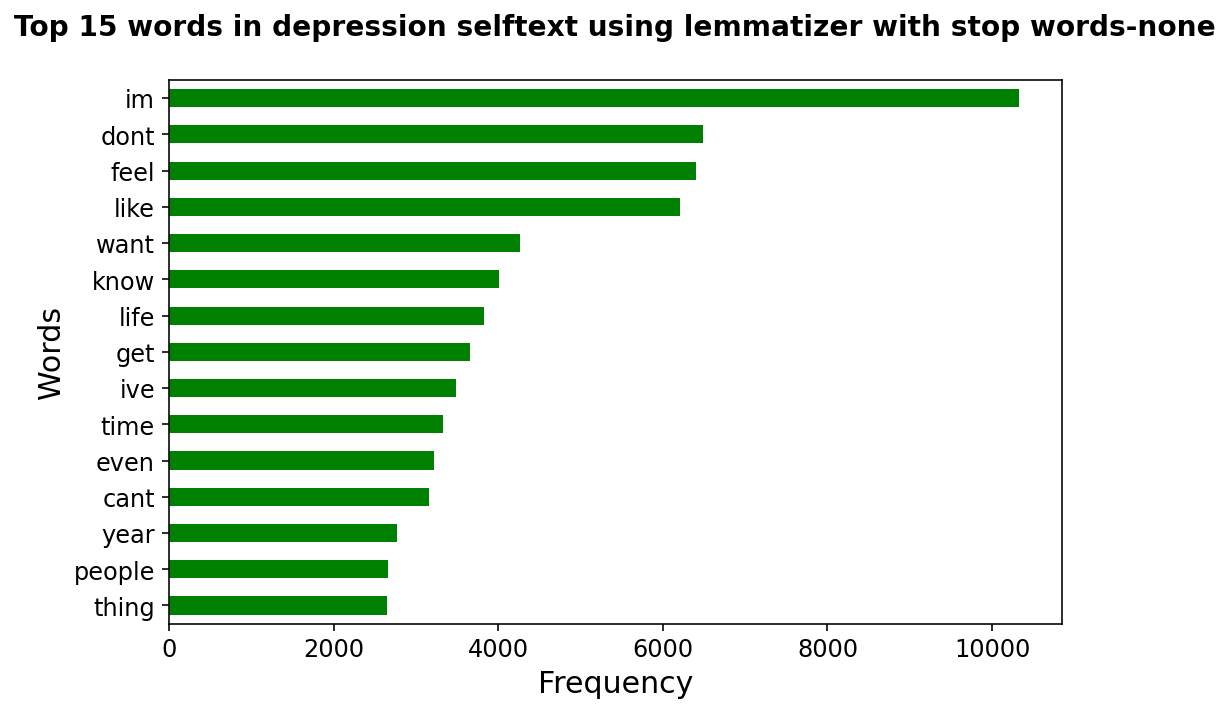

In [385]:
# Plot barchat of the top 15 words in depression using lemming and no stop words
plot_barchat(selftext_lem_cv_df.sum().sort_values(ascending=False).head(15)[::-1], "Top 15 words in depression selftext using lemmatizer with stop words-none\n","Frequency","Words", 'green')

**Depression selftext - Lemming - Stop words 'english'**

In [225]:
# Depresion selftext - Lemming into Countvectorizer with selection of stop words - 'english'
cv_eng = CountVectorizer(stop_words='english', min_df=2)
cv_eng.fit(depression_selftext_lem)
selftext_lem_cv_eng = cv_eng.transform(depression_selftext_lem)
selftext_lem_cv_eng_df = pd.DataFrame(selftext_lem_cv_eng.todense(), columns=cv_eng.get_feature_names())

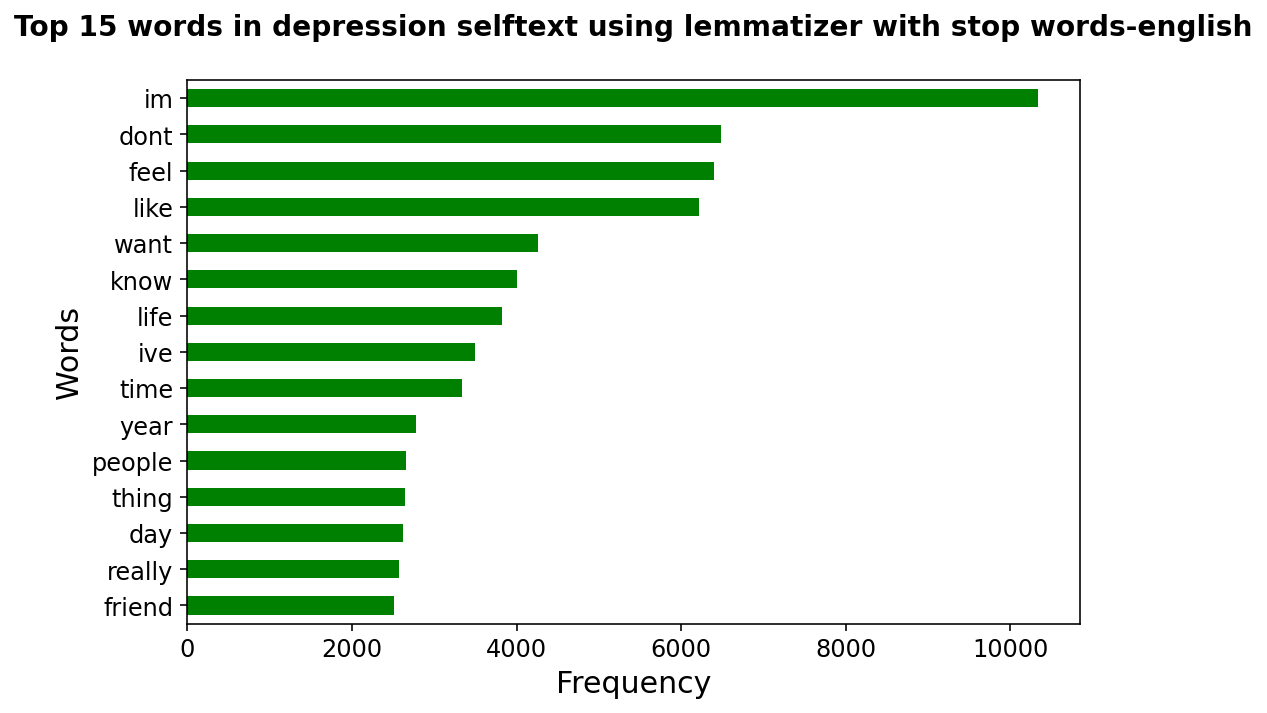

In [386]:
plot_barchat(selftext_lem_cv_eng_df.sum().sort_values(ascending=False).head(15)[::-1], "Top 15 words in depression selftext using lemmatizer with stop words-english\n","Frequency","Words", 'green')

**Analysis: The english stop words in countvectorizer further reduces the number of common words on top of the removal of stop words using NLTK library.**

The common words removed are get, even, can't. This indicates that additional removal of common words are required on top of NLTK library. Thus, we will be using the additional stop words-english in countvectorizer to facilitate the enrichment of common words that can distinguish between the two forums.

**4.4.3.4 The differences between using stemming and lemming in countvectorizer**

**Depression selftext - Stemming**

In [252]:
# Depresion selftext - stemming into Countvectorizer with selection of stop words - 'english'
cv_stem_eng = CountVectorizer(stop_words='english', min_df=2)
cv_stem_eng.fit(depression_selftext_pstem)
selftext_stem_cv_eng = cv_stem_eng.transform(depression_selftext_pstem)
selftext_stem_cv_eng_df = pd.DataFrame(selftext_stem_cv_eng.todense(), columns=cv_stem_eng.get_feature_names())

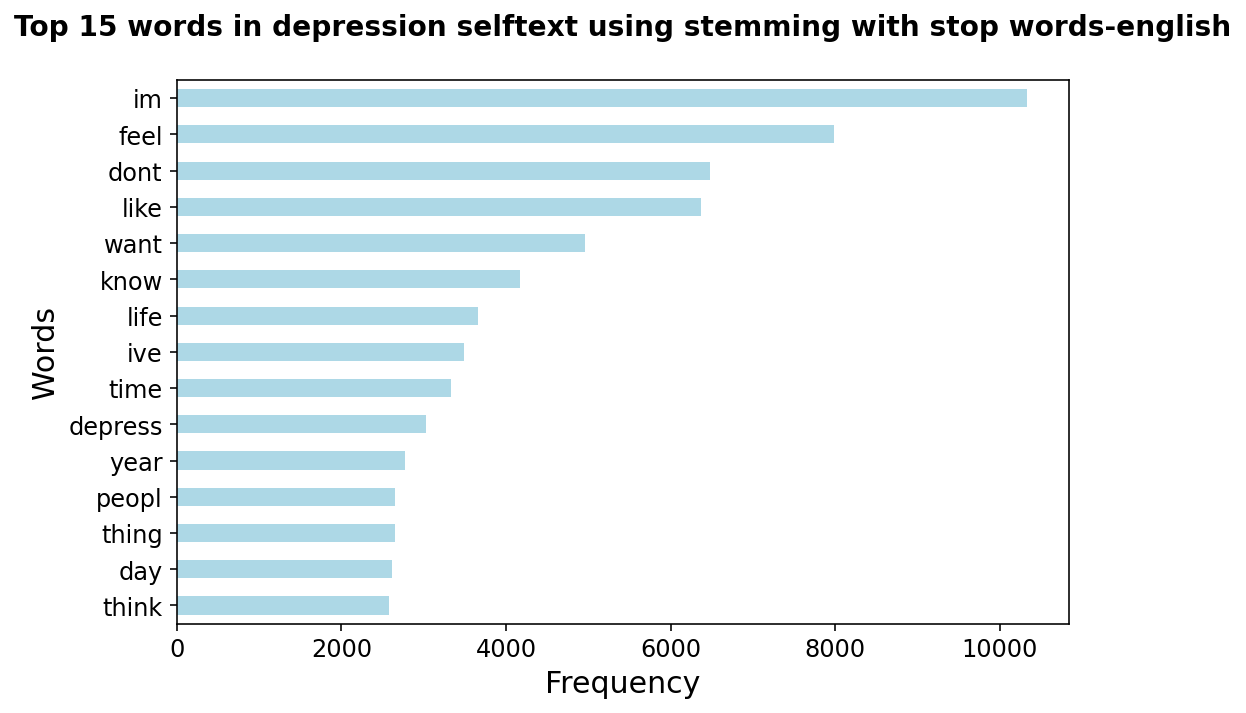

In [388]:
plot_barchat(selftext_stem_cv_eng_df.sum().sort_values(ascending=False).head(15)[::-1], "Top 15 words in depression selftext using stemming with stop words-english\n","Frequency","Words", 'lightblue')

**Analysis: Stemming results in the changes in counts of certain words and enhance the detection of words that are not present in lemming results.**

There are a few changes in counts of certain words such as feel and don't, whereby feel count is higher in stemmed words in comparison with the word don't. This might be due to the stemming indiscriminately cut the words into its original form without taking account of the linguistics resulting in many forms cut into a same word, thus enhances the number of counts of those words. With this, we are able to detect additional words such as depress and think, which are not present in the top 15 words in lemming. On the other hand, lemming accounts linguistics and look at the morphological analysis of each word, therefore the words are more meaningful. Both of these tools have its own advantages and limitation. As seen in the graph above, the word depress, which is the base form of depression, are able to detect with stemming, which should be distinct as it is in posts from the depression forum, this suggests that stemming helps to enrich the key words that symbolizes the respective forum. Hence, we will proceed with the usage of stemming for our further analysis in the top common words in each forum.

**4.4.3.5 The top common words in selftext of depression and foreveralone and the difference of words between these two forums**

**Lonely selftext - Stemming**

In [243]:
# Lonely selftext - stemming into Countvectorizer with selection of stop words - 'english'
cv_lonely_stem_eng = CountVectorizer(stop_words='english', min_df=2)
cv_lonely_stem_eng.fit(lonely_selftext_pstem)
lonely_selftext_stem_cv_eng = cv_lonely_stem_eng.transform(lonely_selftext_pstem)
lonely_title_stem_cv_eng_df = pd.DataFrame(lonely_selftext_stem_cv_eng.todense(), columns=cv_lonely_stem_eng.get_feature_names())

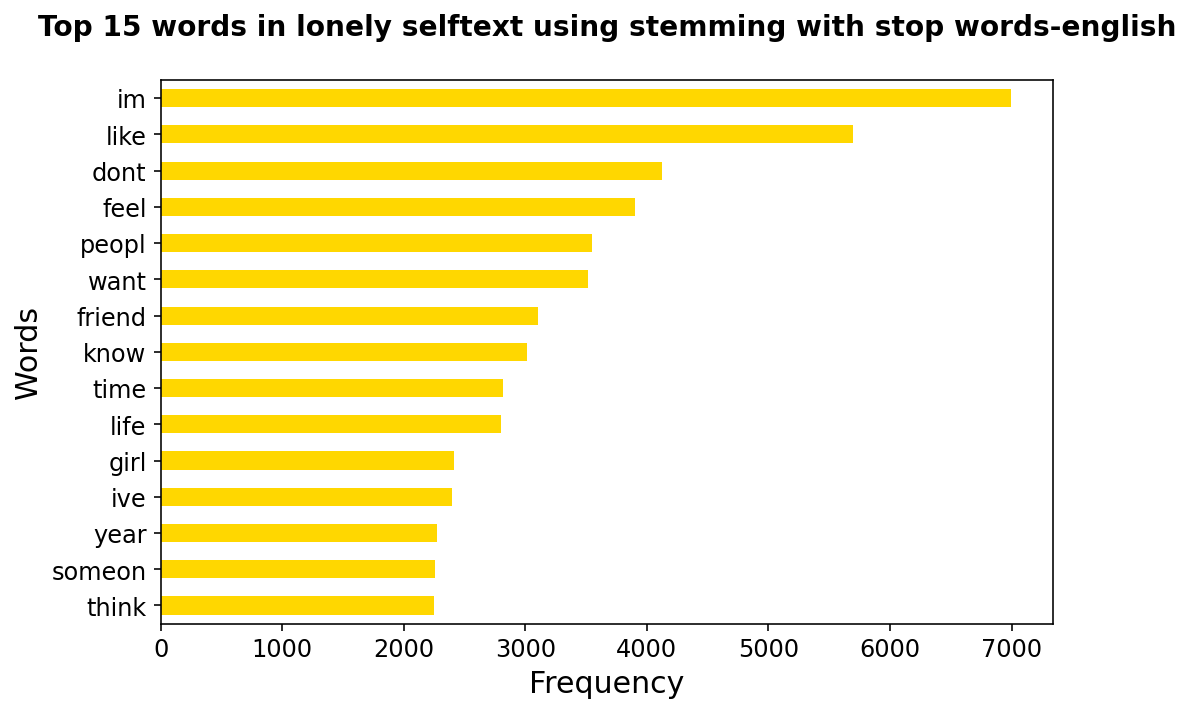

In [550]:
plot_barchat(lonely_title_stem_cv_eng_df.sum().sort_values(ascending=False).head(15)[::-1], "Top 15 words in lonely selftext using stemming with stop words-english\n","Frequency","Words", 'gold')

**Analysis: The detection of words that are present in the top 15 words in one forum and not the other forum.**

Top 15 words in depression from the most common one to the least common one is im, feel, don't, like, want, know, life, ive, time, depress, year, peopl, thing, day and think. There are quite a proportion of common words present in both depression and foreveralone forum with different amount of count words. Interestingly, there are words that have higher placement in one forum over the other forum. Words like depress, thing and day are present in the top 15 words in depression selftext but not in foreveralone forum, while the words present in foreveralone only are friend, girl and someone.

These words are distinct words and closely resembles more towards their forum and the authors. A person who is lonely as they are in need of social human interaction has a tendency to seek companionship, which closely resembles with the words detected, which is friend, girl, someone. While a person who experiences depression, whereby a person being depressed (depress), having repetitive thoughts (think) over time (time, day, year). [[1]](https://www.news-medical.net/health/Intrusive-Thoughts-and-Depression.aspx) Interestingly, the word thing is detected as a frequent word in depression. The reason for detection of thing is not known as thing is often in reference to another object or events. With thing being a reference, it can be postulated that its detection could be due to people being depressed having their daily routine impaired to do things and they have a repetitive thoughts to pick out negatives and reckon only adverse things will occur, thus things with reference to these could often been expressed. [[2]](https://www.rethink.org/advice-and-information/about-mental-illness/learn-more-about-conditions/depression/) Hence, further investigation will be required to understand the word thing having a high occurrence in the common words of depression, which will not be covered in this project as it is beyond this project scope.

With the differences detected, we would like to further explore if there are top common words occuring in one forum and not the other.

Dataframes are formed for depression and lonely stemmed selftext containing the words from countervectorizer respectively. The top 30 words of each dataframe are then extracted out and combined into a dataframe. The words that occurred in one forum and not the other is extracted out and visualized with the barplot.

In [554]:
# To form a dataframe for depression stemmed selftext containing the words from countervectorizer
depression_seltext_stem = pd.DataFrame(np.sum(selftext_stem_cv_eng, axis = 0), columns=cv_stem_eng.get_feature_names(), index =['freq_dep_selftext_stem'])
depression_seltext_stem = depression_seltext_stem.T
depression_seltext_stem = depression_seltext_stem.reset_index()
depression_seltext_stem = depression_seltext_stem.rename(columns ={'index': 'words'})

# To form a dataframe for lonely stemmed selftext containing the words from countervectorizer
lonely_seltext_stem = pd.DataFrame(np.sum(lonely_selftext_stem_cv_eng, axis = 0), columns=cv_lonely_stem_eng.get_feature_names(), index =['freq_lon_selftext_stem'])
lonely_seltext_stem = lonely_seltext_stem.T
lonely_seltext_stem = lonely_seltext_stem.reset_index()
lonely_seltext_stem = lonely_seltext_stem.rename(columns ={'index': 'words'})

# To create a new dataframe containing top 30 words of depression and lonely stemmed selftext respectively
lonely_seltext_stem_30 = lonely_seltext_stem[lonely_seltext_stem['freq_lon_selftext_stem']>1380]
depression_seltext_stem_30 = depression_seltext_stem[depression_seltext_stem['freq_dep_selftext_stem']>1430]
lonely_depression_selftext_stem_30 = pd.merge(depression_seltext_stem_30,lonely_seltext_stem_30, on = 'words', how = 'outer')

#Create a dataframe of the words present in top 30 foreveralone but not in depression forum
depression_selftext_notin_lonely_30 = lonely_depression_selftext_stem_30[(lonely_depression_selftext_stem_30["freq_dep_selftext_stem"].isnull())]
depression_selftext_notin_lonely_30_sort = depression_selftext_notin_lonely_30.sort_values(['freq_lon_selftext_stem']).reset_index(drop=True)

#Create a dataframe of the words present in top 30 depression but not in foreveralone forum
lonely_selftext_notin_depression_30 = lonely_depression_selftext_stem_30[(lonely_depression_selftext_stem_30["freq_lon_selftext_stem"].isnull())]
lonely_selftext_notin_depression_30_sort = lonely_selftext_notin_depression_30.sort_values(['freq_dep_selftext_stem']).reset_index(drop=True)

# Print to visualize the dataframe
print("The dataframe of depression stemmed selftext with its number of words occurrences in the depression forum\n")
print(depression_seltext_stem[depression_seltext_stem['freq_dep_selftext_stem']>1000].sort_values(by='freq_dep_selftext_stem', ascending = False).head(5))
print("\nThe dataframe of lonely stemmed selftext with its number of words occurrences in the foreveralone forum\n")
print(lonely_seltext_stem[lonely_seltext_stem['freq_lon_selftext_stem']>1000].sort_values(by='freq_lon_selftext_stem', ascending = False).head(5))
print(f"\nThe dataframe consists of top 30 words in depression selftext\n{depression_seltext_stem_30 .count()}")
print(f"\nThe dataframe consists of top 30 words in lonely selftext\n{lonely_seltext_stem_30.count()}")
print(f"\nThe present of certain words in one forum and absence in another forum\n {lonely_depression_selftext_stem_30.loc[(lonely_depression_selftext_stem_30.freq_dep_selftext_stem.isnull()) | (lonely_depression_selftext_stem_30.freq_lon_selftext_stem.isnull()), :].head(5)}")

The dataframe of depression stemmed selftext with its number of words occurrences in the depression forum

     words  freq_dep_selftext_stem
2657    im                   10329
1979  feel                    7981
1551  dont                    6484
3092  like                    6366
5896  want                    4963

The dataframe of lonely stemmed selftext with its number of words occurrences in the foreveralone forum

      words  freq_lon_selftext_stem
2758     im                    6994
3220   like                    5700
1585   dont                    4123
2031   feel                    3906
4029  peopl                    3549

The dataframe consists of top 30 words in depression selftext
words                     30
freq_dep_selftext_stem    30
dtype: int64

The dataframe consists of top 30 words in lonely selftext
words                     30
freq_lon_selftext_stem    30
dtype: int64

The present of certain words in one forum and absence in another forum
      words  freq_dep_sel

In [401]:
# Define function of plotting barplot
def plot_barplot(dataframe, x_data, y_data, title, x_label, y_label):
    """Plot barplot with the input details and labels.
    The output is a horizontal barplot"""
    fig, ax = plt.subplots(figsize=(5, 8))
    sns.barplot(data = dataframe, y = y_data, x = x_data, orient='h', ax=ax)
    plt.xlabel(x_label, fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.ylabel(y_label, fontsize = 15)
    plt.title(title, fontsize = 14, weight = 'bold');
    return plt.show()

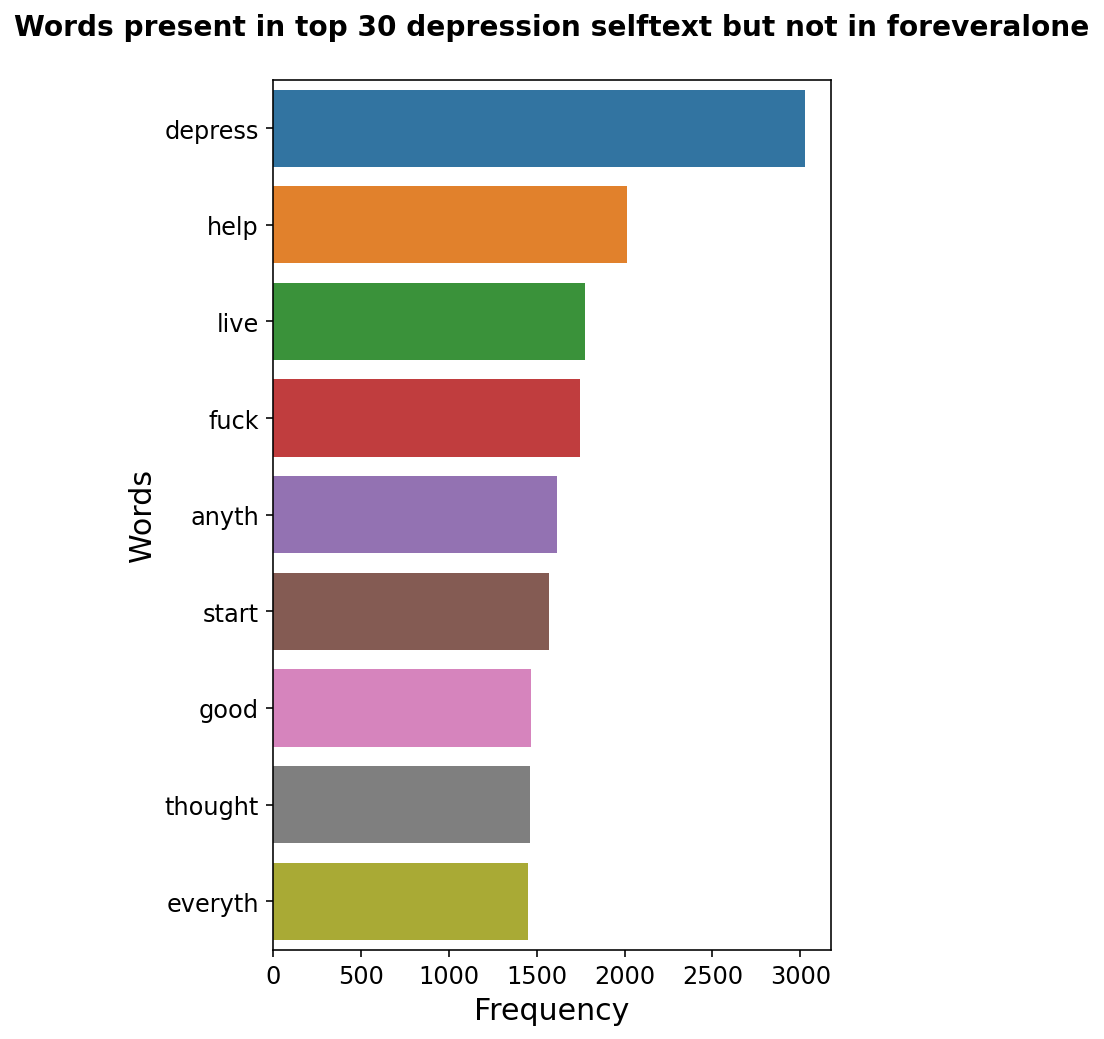

In [599]:
plot_barplot(lonely_selftext_notin_depression_30_sort[::-1], "freq_dep_selftext_stem", "words","Words present in top 30 depression selftext but not in foreveralone\n","Frequency","Words")

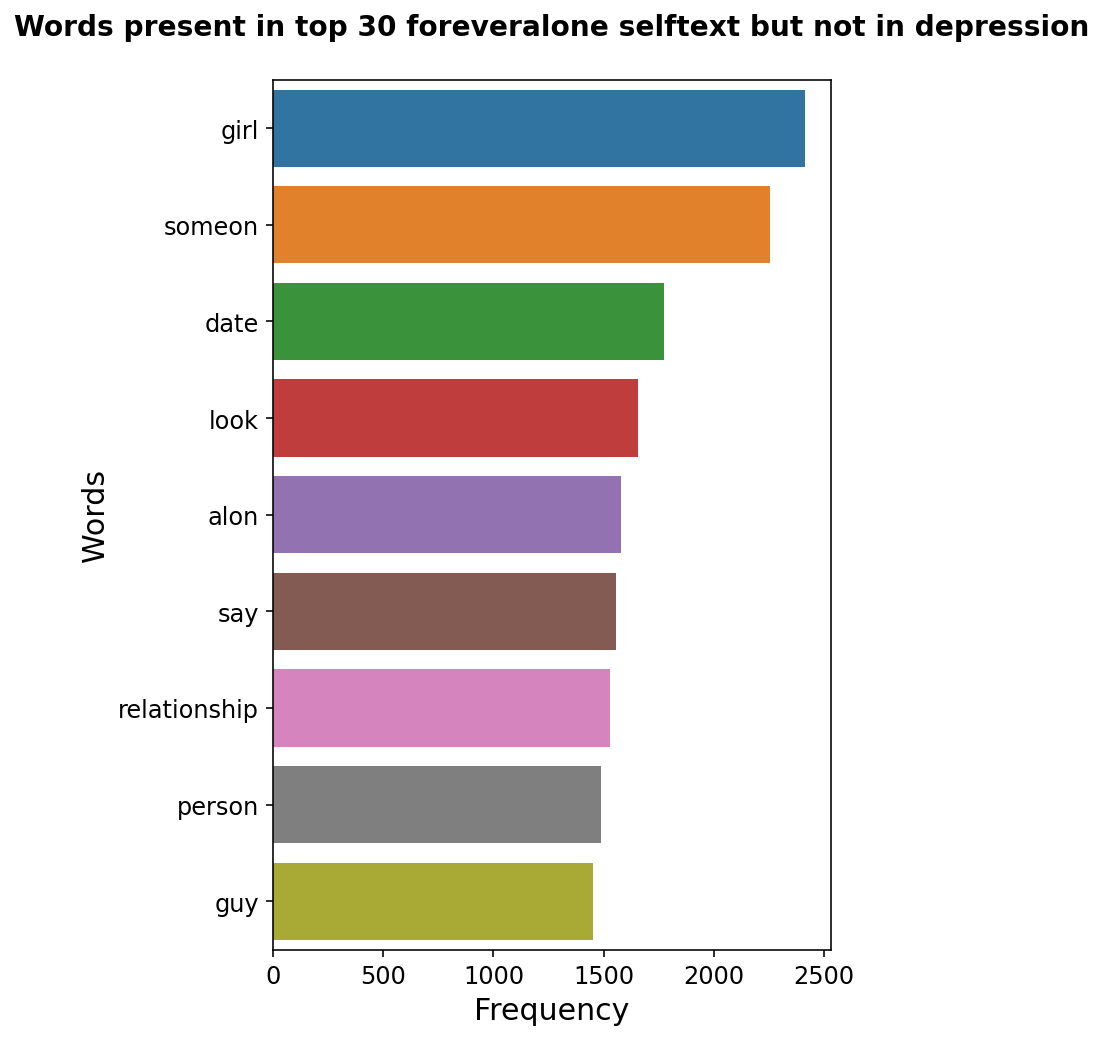

In [598]:
plot_barplot(depression_selftext_notin_lonely_30_sort[::-1], "freq_lon_selftext_stem", "words","Words present in top 30 foreveralone selftext but not in depression\n","Frequency","Words")

**Analysis: Out of the top 30 common words, the top 9 words present in depression forum only are related to life and thoughts while top 9 words in foreveralone forum only are related to companionship.**

The words present in top 30 of one forum and not the other forum are as listed from the most common to the less common are as followed:-
* Words only in depresion forum: depress, help, live, fuck, anyth, start, good, thought, everyth.
* Words only in lonely forum: girl, someon, date, look, alon, say, relationship, person, guy.

The words that are present in lonely forum only are more related to companionship, while the words that are present in depression forum only are related to life and thoughts. This coincide with the behavioural of a person experiencing depression and loneliness whereby loneliness is a transient emotional state that corresponds to a person needs for belonging and connection while depression is a condition that can significantly affect a person's ability to function normally with its persistent negative feelings of emptiness, worthlessness, hopelessness and sadness[[1]](https://www.healthline.com/health/loneliness-and-depression) [[2]](https://www.mentalhelp.net/depression/hotline/). As people who are under depressed have the absence of positive emotion, the positive emotion words detected such as start and good might suggests the authors are trying to instill positive thoughts to combat depression or encourage other authors in their posts to promote positive emotions, which are found to help relieve depression.[[3]](https://www.mentalhelp.net/blogs/depression-and-positive-vs-negative-emotional-states/). Thus, these words found only in the respective forum can provide an insight during the assessment or identification of people experiencing loneliness and depression process.

**4.4.3.6 The top common words in title of depression and foreveralone and the difference of words between these two forums**

**Depression title - Stemming**

In [235]:
# Depression title - stemming into Countvectorizer with selection of stop words - 'english'
cv_tltstem_eng = CountVectorizer(stop_words='english', min_df=2)
cv_tltstem_eng.fit(depression_title_pstem)
title_stem_cv_eng = cv_tltstem_eng.transform(depression_title_pstem)
title_stem_cv_eng_df = pd.DataFrame(title_stem_cv_eng.todense(), columns=cv_tltstem_eng.get_feature_names())

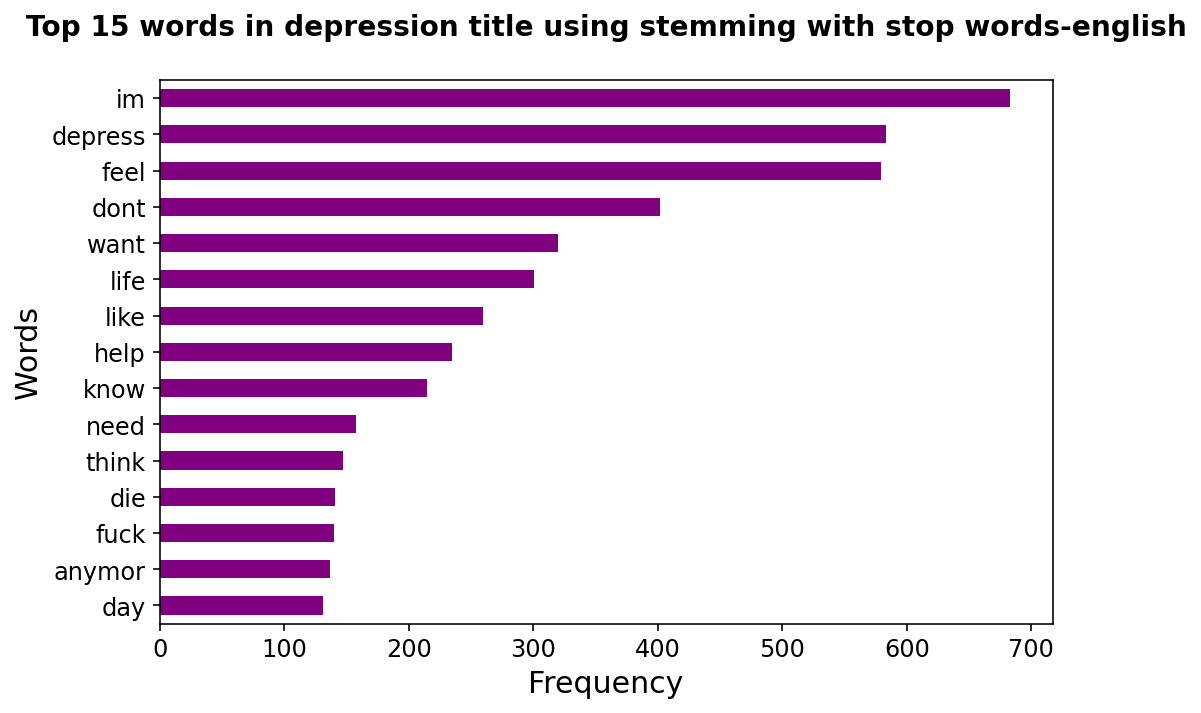

In [389]:
plot_barchat(title_stem_cv_eng_df.sum().sort_values(ascending=False).head(15)[::-1], "Top 15 words in depression title using stemming with stop words-english\n","Frequency","Words", 'purple')

**Lonely title - Stemming**

In [407]:
# Lonely title - stemming into Countvectorizer with selection of stop words - 'english'
cv_tltlon_stem_eng = CountVectorizer(stop_words='english', min_df=2)
cv_tltlon_stem_eng.fit(lonely_title_pstem)
title_lon_stem_cv_eng = cv_tltlon_stem_eng.transform(lonely_title_pstem)
title_lon_stem_cv_eng_df = pd.DataFrame(title_lon_stem_cv_eng.todense(), columns=cv_tltlon_stem_eng.get_feature_names())

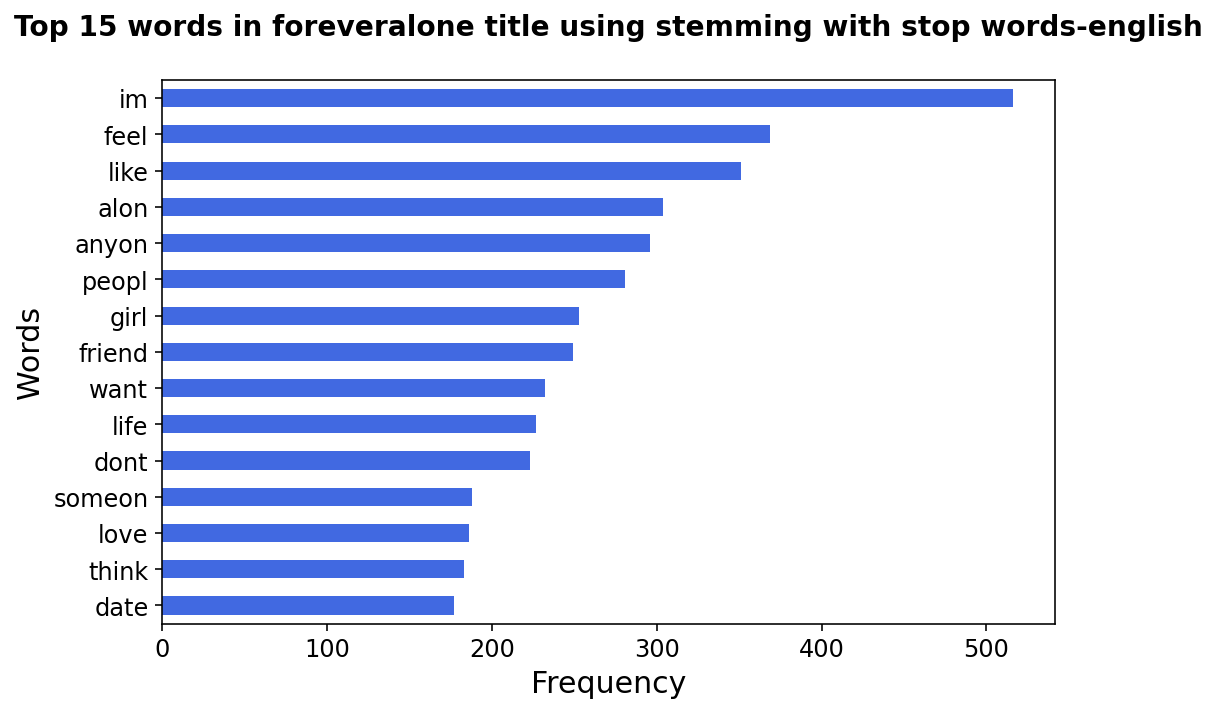

In [408]:
plot_barchat(title_lon_stem_cv_eng_df.sum().sort_values(ascending=False).head(15)[::-1], "Top 15 words in foreveralone title using stemming with stop words-english\n","Frequency","Words", 'royalblue')

**Analysis: The title consists of more words specific to the forum, which might serves as a better platform to find the top word features that distinguish the differences between the forums than selftext.**

The top 15 words from the most common words to the least common words are as followed:-
* Depression title: im, depress, feel, don't, want, life, like, help, know, need, think, die, fuck, anymor, day
* Lonely title: im, feel, like, alon, anyon, peopl, girl, friend, want, life, dont, someon, love, think, date

There are quite a proportion of common words present in both depression and foreveralone forum with different amount of count words. Interestingly, there are words that have higher placement in one forum over the other forum. Words like depress,help, know, need, die, fuck, anymor and day are present in the top 15 words in depression selftext but not in foreveralone forum, while the words present in foreveralone only are alon,anyon, peopl, girl, friend,someon, love and date. Interestingly, the differences between the depression title and loneliness title is higher than the differences seen in selftext, which is a ratio of 8 to 3 (title:selftext). These differences words seen here coincide with the behavioural of a person experiencing depression and loneliness as discuss previously, in which the words in lonely forum are more related to companionship and words in depression forum are life and thoughts in particular negative thoughts. 

The words present in the title consists more of the words that are specific to their respective forum for the top 30 words. For depression title, it consists of help and fuck which are not present in the selftext, while for lonely title, date and alon is present but not in its selftext. This could be due to the high amount of word counts in title in comparison with the title, which ranges in thousand for selftext and less than a hundred in title. Thus, with a significant reduction in words, non-present of other non-specific words and the tendency of author to display concise and key description in the title, resulting in the enhance key words found in title. With this finding, it might suggests title can be a better platform to find the top word features and a better indicator to distinguish the differences between loneliness and depression in social media forum than selftext.

Dataframes are formed for depression and lonely stemmed title containing the words from countervectorizer respectively. The top 31 words of each dataframe are then extracted out and combined into a dataframe. The words that occurred in one forum and not the other is extracted out and visualized with the barplot.

In [556]:
# To form a dataframe for depression stemmed title containing the words from countervectorizer
depression_title_stem = pd.DataFrame(np.sum(title_stem_cv_eng, axis = 0), columns=cv_tltstem_eng.get_feature_names(), index =['freq_dep_title_stem'])
depression_title_stem = depression_title_stem.T
depression_title_stem = depression_title_stem.reset_index()
depression_title_stem = depression_title_stem.rename(columns ={'index': 'words'})

# To form a dataframe for lonely stemmed title containing the words from countervectorizer
lonely_title_stem = pd.DataFrame(np.sum(title_lon_stem_cv_eng, axis = 0), columns=cv_tltlon_stem_eng.get_feature_names(), index =['freq_lon_title_stem'])
lonely_title_stem = lonely_title_stem.T
lonely_title_stem = lonely_title_stem.reset_index()
lonely_title_stem = lonely_title_stem.rename(columns ={'index': 'words'})

# To create a new dataframe containing top 30 words of depression and lonely stemmed title respectively
lonely_title_stem_30 = lonely_title_stem[lonely_title_stem['freq_lon_title_stem']>96]
depression_title_stem_30 = depression_title_stem[depression_title_stem['freq_dep_title_stem']>85]
lonely_depression_title_stem_30 = pd.merge(depression_title_stem_30,lonely_title_stem_30, on = 'words', how = 'outer')

#Create a dataframe of the words present in top 30 foreveralone but not in depression forum
depression_title_notin_lonely_30 = lonely_depression_title_stem_30[(lonely_depression_title_stem_30["freq_dep_title_stem"].isnull())]
depression_title_notin_lonely_30_sort = depression_title_notin_lonely_30.sort_values(['freq_lon_title_stem']).reset_index(drop=True)

#Create a dataframe of the words present in top 30 depression but not in foreveralone forum
lonely_title_notin_depression_30 = lonely_depression_title_stem_30[(lonely_depression_title_stem_30["freq_lon_title_stem"].isnull())]
lonely_title_notin_depression_30_sort = lonely_title_notin_depression_30.sort_values(['freq_dep_title_stem']).reset_index(drop=True)

print("The dataframe of depression stemmed title with its number of words occurrences in the depression forum\n")
print(depression_title_stem[depression_title_stem['freq_dep_title_stem']>100].sort_values(by='freq_dep_title_stem', ascending = False).head())
print("\nThe dataframe of lonely stemmed title with its number of words occurrences in the foreveralone forum\n")
print(lonely_title_stem[lonely_title_stem['freq_lon_title_stem']>100].sort_values(by='freq_lon_title_stem', ascending = False).head(5))
print(f"\nThe dataframe consists of top 30 words in depression selftext\n{depression_title_stem_30 .count()}")
print(f"\nThe dataframe consists of top 30 words in lonely selftext\n{lonely_title_stem_30.count()}")
print(f"\nThe present of certain words in one forum and absence in another forum\n {lonely_depression_title_stem_30.loc[(lonely_depression_title_stem_30.freq_dep_title_stem.isnull()) | (lonely_depression_title_stem_30.freq_lon_title_stem.isnull()), :].head(5)}")

The dataframe of depression stemmed title with its number of words occurrences in the depression forum

        words  freq_dep_title_stem
553        im                  683
276   depress                  583
408      feel                  579
311      dont                  402
1187     want                  320

The dataframe of lonely stemmed title with its number of words occurrences in the foreveralone forum

     words  freq_lon_title_stem
633     im                  516
458   feel                  369
736   like                  351
38    alon                  304
55   anyon                  296

The dataframe consists of top 30 words in depression selftext
words                  31
freq_dep_title_stem    31
dtype: int64

The dataframe consists of top 30 words in lonely selftext
words                  31
freq_lon_title_stem    31
dtype: int64

The present of certain words in one forum and absence in another forum
       words  freq_dep_title_stem  freq_lon_title_stem
0    anymor 

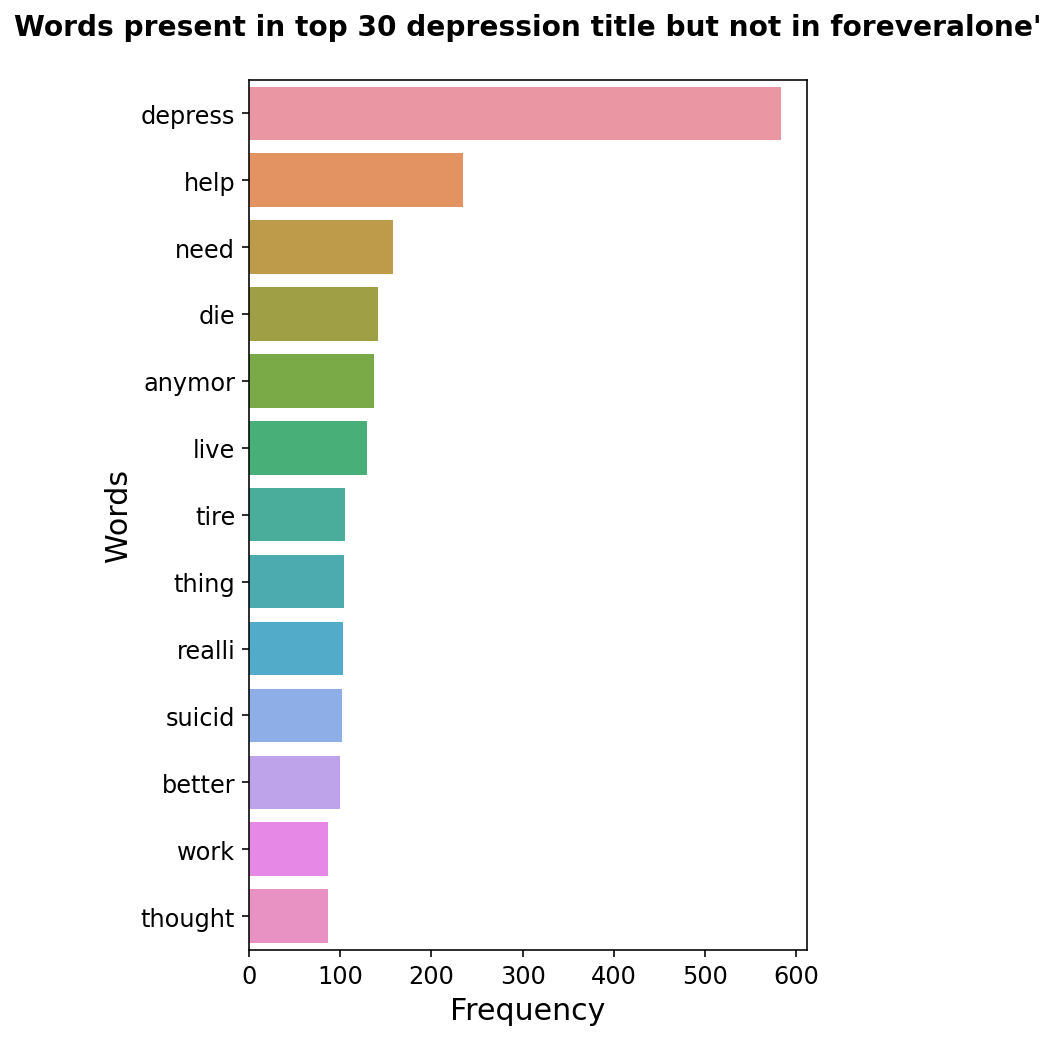

In [541]:
plot_barplot(lonely_title_notin_depression_30_sort[::-1], "freq_dep_title_stem", "words","Words present in top 30 depression title but not in foreveralone'\n","Frequency","Words")

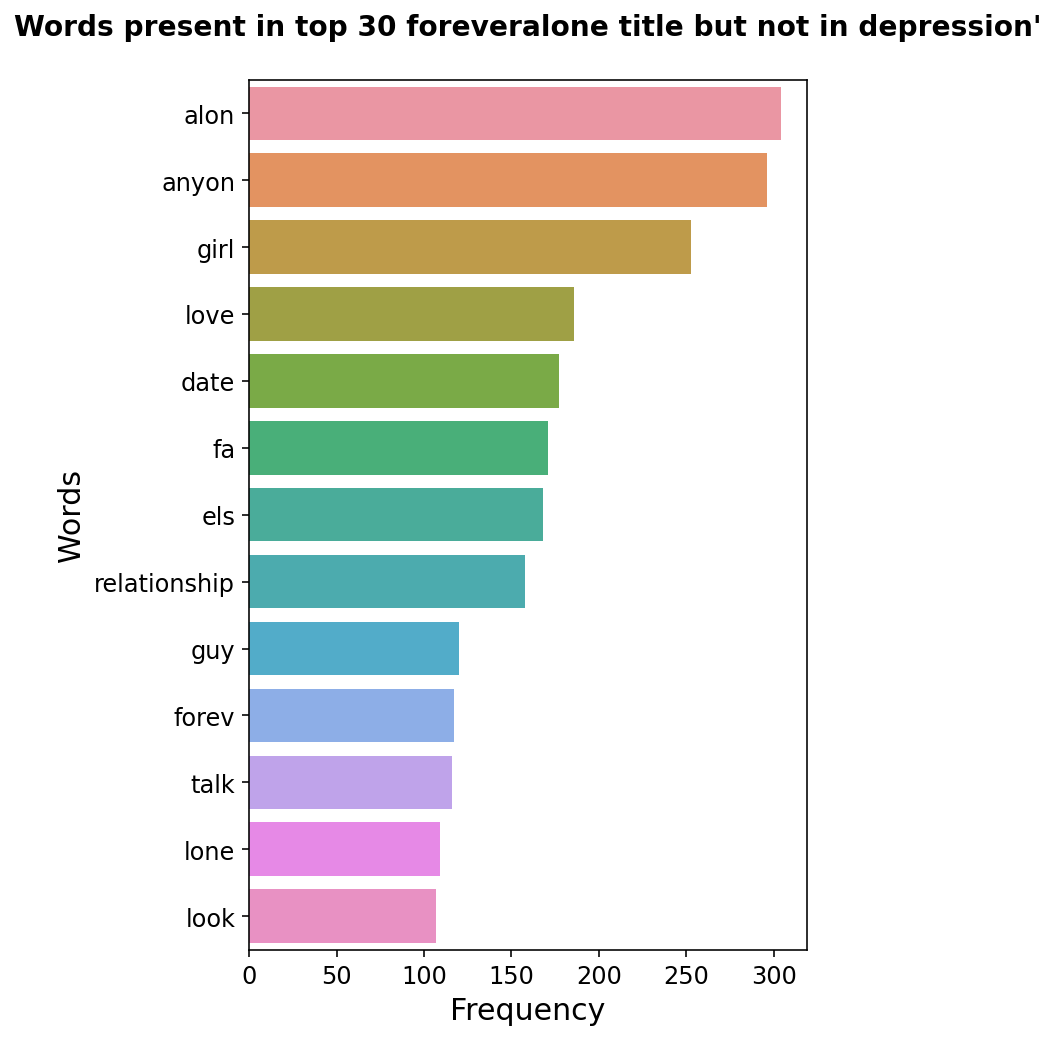

In [557]:
plot_barplot(depression_title_notin_lonely_30_sort[::-1], "freq_lon_title_stem", "words","Words present in top 30 foreveralone title but not in depression'\n","Frequency","Words")

**Analysis: Similar words detected in top 30 words specific to the forum selftext, which suggest that these words are key words that may distinguish the differences between loneliness and depression.**

The words that occurred in a forum only for the top 30 words are as followed, which are listed from the most common words to the least common words:-
* Depression title: depress, help, need, die, anymor, live, tire, thing, realli, suicid, better, work, thought
* Foreveralone title: alon, anyon, girl, love, date, fa, els, relationship, guy, forev, talk, lone, look

These words found here coincide with the behavioural of a person experiencing depression and loneliness as discuss previously with word in foreveralone forum are more related to companionship and words in depression forum are life and thoughts in particular negative thoughts and some positive thoughts which might suggests inspiration and motivation to combat depression.

There are a quite a proportion of these words found in the respective title. For depression, there are depress, help, need, die, anymor while in loneliness title is alon, anyon, girl, love, date. The presence of specific words found in the top 30 words in title is more than selftext with a ratio of 5 to 1-2 (title:selftext). 

The words found here share some similarity with words occurs only in the top 30 of a specific forum. For depression, the similarity between title and selftext specific words found are depress, help, live, thought. While in loneliness, the similarity is alon, girl, date, relationship, guy. As these specific words are found in both title and selftext, this might indicate that these words are key words that may distinguish the differences between loneliness and depression. Thus, this suggest that a higher emphasis should be placed into these words when during the assessment or identification of people experiencing loneliness and depression process. Hence, the top 10 differences between depression and loneliness behavioural through the word expression is alon, girl, date, relationship, guy, depress, help, live, thought, need.

### Summary

**Pre-processing**

1. The selftext and title has been subjected to stop removal using NLTK library as a reference and stemming or lemming.
2. The english stop words in countvectorizer further reduces the number of common words on top of the removal of stop words using NLTK library.
3. Stemming helps to revert the words back to their root form, which reduces the number of words with the expense of some truncated words. This results in the changes in counts of certain words and enhance the detection of words that are not present in lemming results.

**Analysis of common words in selftext and title**

1. There are words that are present in the top 15 words in one forum and not the other forum.
2. Out of the top 30 common words, the top 9 words present in depression forum only are related to life and thoughts while top 9 words in foreveralone forum only are related to companionship. Thus, these words can provide an insight during the assessment or identification of people experiencing loneliness and depression process.
3. The title consists of more words specific to the forum, which might serves as a better platform to find the top word features that distinguish the differences between the forums than selftext. With this finding, it might suggests title can be a better platform to find the top word features and a better indicator to distinguish the differences between loneliness and depression in social media forum than selftext.
4. Similar words detected in top 30 words specific to the forum selftext, which suggest that these words are key words that may distinguish the differences between loneliness and depression. This suggest that a higher emphasis should be placed into these words when during the assessment or identification of people experiencing loneliness and depression process.
5. From this findings, we have discovered words that occurred in top 30 words specific to depression forum only and foreveralone forum only. The words found in both selftext and title can be used as words to distinguish the differences between loneliness and depression in social media forum and will provide an insight to facilitate the mental health institution in the assessment or identification process of people experiencing loneliness and depression. 

**Top 30 words specific to the forum**
* Similar words found in both selftext and title:
    * Depression: depress, help, live, thought
    * Foreveralone: alon, girl, date, relationship, guy


* Words found in selftext only:
    * Depression selftext: fuck, anyth, start, good, thought, everyth.
    * Foreveralone selftext: someon, look, say, person
    

* Words found in title only:
    * Depression title: need, die, anymor, tire, thing, realli, suicid, better, work
    * Foreveralone title: anyon, love, forev, talk, lone, look, fa, els


## 4.6. Summary

To understand more on the selftext, title and authors, the following exploration has been performed:-

1. The length of the posts (selftext) and title by users
    * There is a non-symmetrical distribution in both selftext_word_count and title_word_count, which are highly positvely skewed.
    * Majority of the users have less than 500 words in selftext (post).
    * Majority of the users have less than 15 words in the title post.
    * Majority of the title posts in foreveralone have a longer range of words than in depression.


2. Frequency of total posts by authors
    * There is a non-symmetrical distribution in total_posts of depression and foreveralone and foreveralone has more posts per user in comparison with depression.
    * The are unique authors present in both depression and foreveralone, which is less than 1% of the compilation dataset.
    * it is to note that there are authors that are lonely and depressed but as there is 1% authors of the both forums, the dataset is representative for our further analysis to distinguish and classify between the two forums.


3. The usage of emojis in depression_data and lonely_data
    * Of the total selftext, 2% of the selftext contains emoji and the emoji usage are balanced between the two forums
    * Of the total title, 0.4% of the selftext contains emoji and 22 of these, the emoji usage are slightly higher in depression forum compared to foreveralone with a ratio of 60:40.
    * Due to the title and selftext having emoji is very few, the emoji usage in title would not be able to use to distiguish the forum in which the posts belong to.


4. Preprocessing and word counts
    * The selftext and title has been subjected to stop removal using NLTK library as a reference and stemming or lemming.
    * The english stop words in countvectorizer further reduces the number of common words on top of the removal of stop words using NLTK library.
    * Stemming helps to revert the words back to their root form, which reduces the number of words with the expense of some truncated words. This results in the changes in counts of certain words and enhance the detection of words that are not present in lemming results.
    * We have discovered words that occurred in top 30 words specific to depression forum only and foreveralone forum only. The words found in both selftext and title can be used as words to distinguish the differences between loneliness and depression in social media forum and will provide an insight to facilitate the mental health institution in the assessment or identification process of people experiencing loneliness and depression. 

## Exporting Data

In [141]:
# Placed the # to refrain from executing
#depression_lonely_data.to_csv("../data/depression_lonely_data_clean.csv", index = False) 

## References

[1] C. Raypole, "Loneliness and Depression: What's the Connection?," *Healthline Media*, July 2, 2020. [Online]. Available: https://www.healthline.com/health/loneliness-and-depression [Accessed: Apr. 17, 2021].

[2] "Depression Hotline Number," *MentalHelp.net*. [Online]. Available: https://www.mentalhelp.net/depression/hotline/ [Accessed: Apr. 17, 2021].

[3] A. N. Schwartz,"Depression and Positive vs Negative Emotional State," *MentalHelp.net*. [Online]. Available: https://www.mentalhelp.net/blogs/depression-and-positive-vs-negative-emotional-states/ [Accessed: Apr. 22, 2021].
